In [1]:
import pandas as pd

In [2]:
#ga_hits = pd.read_csv(r'C:\Users\1\Documents\ФИНАЛЬНАЯ РАБОТА\ga_hits.csv')
#ga_hits.head(10)

In [3]:
chunksize = 10**4
chunks = pd.read_csv(r'C:\Users\1\Documents\ФИНАЛЬНАЯ РАБОТА\ga_hits.csv',chunksize=chunksize)
ga_hits = pd.concat(chunks, ignore_index=True)

In [4]:
ga_hits.head(10)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,event,NaN,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,NaN,NaN
6,281215510786615563.1640245516.1640245516,2021-12-23,911854.0,102,event,NaN,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,NaN,NaN
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,event,NaN,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,NaN,NaN
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,NaN,NaN
9,2692901778487480807.1640206845.1640206845,2021-12-23,0.0,1,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,NaN,NaN


In [5]:
ga_hits.shape

(15726470, 11)

In [6]:
print('Размер выборки:{},{}'.format(ga_hits.shape[0],ga_hits.shape[1]))

Размер выборки:15726470,11


In [7]:
ga_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [8]:
#Распечатаем данные некоторых столбцов
#ga_hits.event_category.values.tolist()

In [9]:
#ga_hits.event_value.values.tolist()

In [10]:
#ga_hits.event_label.values.tolist()

In [11]:
ga_hits.event_label.describe()

count                 11966286
unique                   39825
top       KclpemfoHstknWHFiLit
freq                   6505447
Name: event_label, dtype: object

In [12]:
ga_hits.columns.values.tolist()

['session_id',
 'hit_date',
 'hit_time',
 'hit_number',
 'hit_type',
 'hit_referer',
 'hit_page_path',
 'event_category',
 'event_action',
 'event_label',
 'event_value']

In [13]:
#Основные описательные статистики для числовых колонок
ga_hits.describe()


,hit_time,hit_number,event_value
count,6.566148e+06,1.572647e+07,0.0
mean,2.091050e+05,2.356715e+01,NaN
std,4.032110e+05,2.887713e+01,NaN
min,0.000000e+00,1.000000e+00,NaN
25%,2.412000e+04,7.000000e+00,NaN
50%,8.994100e+04,1.500000e+01,NaN
75%,2.195352e+05,2.900000e+01,NaN
max,1.315688e+07,5.000000e+02,NaN


In [14]:
#Распечатайте в цикле по каждой колонке название колонки, количество уникальных значений, а затем список возможных значений вместе с их количеством появления в датасете.
dataset = list(ga_hits.columns)
for i in dataset:
  print('Характеристика', i)
  print('Количество уникальных значений:',ga_hits[i].nunique())
  print('Список знаений:',ga_hits[i].value_counts())

Характеристика session_id
Количество уникальных значений: 1734610
Список знаений: session_id
5442565791571325612.1632449195.1632449195    768
6568868914238486437.1632270313.1632270313    678
5959671972744778783.1632490527.1632490600    548
7452598043578978502.1632358598.1632358598    514
3070792010704358528.1629752408.1629752408    498
                                            ... 
4570994095441102117.1630324006.1630324006      1
768506153535315810.1630314342.1630314342       1
5517253735248338264.1630315080.1630315080      1
4054272189286640867.1630334209.1630334209      1
5381267721977892188.1640271196.1640271196      1
Name: count, Length: 1734610, dtype: int64
Характеристика hit_date
Количество уникальных значений: 226
Список знаений: hit_date
2021-05-24    513035
2021-12-21    280192
2021-05-25    235805
2021-09-23    168899
2021-05-26    158382
               ...  
2021-07-24     23490
2021-05-23     18773
2021-05-19     14605
2021-05-22     13917
2021-05-21     13497
Name: cou

In [15]:
#Статистики по строковым данным
ga_hits[[ 'hit_type', 'event_category','hit_page_path', 'event_category', 'event_action', 'event_label']].describe()

,hit_type,event_category,hit_page_path,event_category,event_action,event_label
count,15726470,15726470,15726470,15726470,15726470,11966286
unique,1,52,342715,52,230,39825
top,event,card_web,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit
freq,15726470,7456998,2793639,7456998,3558985,6505447


In [16]:
# Определим минимальное значение для числовых колонок датафрейма
#hits_df.min(numeric_only = True)

In [17]:
ga_hits.mode()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5442565791571325612.1632449195.1632449195,2021-05-24,0.0,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN


In [18]:
#ga_hits.median()

In [19]:
#Выведем все значения колонки hit_type. Видно, что она неинформативная. Её можно удалить.
ga_hits['hit_type'].value_counts()

hit_type
event    15726470
Name: count, dtype: int64

In [20]:
#ыведем для каждого значения целевой переменной его долю вхождения в выборку.
ga_hits.event_action.describe()

count      15726470
unique          230
top       view_card
freq        3558985
Name: event_action, dtype: object

In [21]:
#посмотрим само значение и сколько раз это значение встречалось в столбце
ga_hits['event_action'].value_counts()

event_action
view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: count, Length: 230, dtype: int64

In [22]:
ga_hits['event_action'].nunique()

230

In [23]:
ga_hits['event_action'].unique()

array(['quiz_show', 'view_card', 'sub_landing', 'photos_all',
       'quiz_start', 'search_kpp', 'start_auth', 'start_chat',
       'go_to_offer', 'name_entered', 'view_new_card', 'search_color',
       'search_drive', 'search_km_to', 'user_message', 'analystlabel',
       'click_on_logo', 'click_on_menu', 'phone_entered', 'search_engine',
       'sub_view_cars_click', 'go_to_car_card', 'search_form_clear',
       'search_km_from', 'view_used_card', 'search_power_to',
       'surname_entered', 'view_more_click', 'showed_number_ads',
       'listing_ads_sort', 'pagination_click', 'phone_auth_start',
       'search_body_type', 'show_phone_input', 'sub_account_page',
       'click_on_get_code', 'search_power_from', 'search_form_region',
       'patronymic_entered', 'sber_id_auth_start', 'sub_submit_success',
       'search_form_rental', 'click_on_yes_its_me', 'search_form_cost_to',
       'search_form_year_to', 'show_sms_code_input',
       'sub_car_claim_click', 'click_on_subscription',


In [24]:
#Проверим, есть ли пропущенные значения в столбце. Видно, что их нет.
ga_hits['event_action'].isna().sum()

0

In [25]:
#ga_hits[hits_df['event_action'].isna()]

In [26]:
ga_hits['hit_page_path'].nunique()

342715

In [27]:
ga_hits['hit_page_path'].unique()

array(['sberauto.com/cars?utm_source_initial=google&utm_medium_initial=cpc&utm_campaign_initial=bJJuEXRheRIxXEaYIXqM|BmWKiKCvBVipoWOpNUIL&utm_content_initial=yXzSAJWSuRbYeLFyMVFl|iJxXDTgPAXGQYOdgCzqe|xAEYTlJDbQNwQTLGxICQ|pmvTbUlmnwAkuHIbvKUg|lFpAoUqEvHoyZfCNRuCR|oxjYxrkwnRSTTYcVZzdb|dtYJKUplNmmKCOfiziff|NgTCwCMgdzcCqxiALuwY|aHSPdWXGkJravzWuwcJA|HbolMJUevblAbkHClEQa|kqZPVvZmXADsCZxIQwbv|QaGunexmXrztCWbLcYxs|OfdDOXSwHYclonQJpPxh|htxLmqvAkmISCliXGMzb|HbolMJUevblAbkHClEQa&utm_term_initial=&city=1&rental_page=rental_only&rental_car=rental_only&city=18',
       'sberauto.com/cars/fiat?city=1&city=18&rental_car=rental_only&utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=zxoiLxhuSIFrCeTLQVWZ&rental_page=rental_only',
       'sberauto.com/cars/all/volkswagen/polo/e994838f?utm_source_initial=yandex&utm_medium_initial=cpc&utm_campaign_initial=nSReTmyFtbSjlPrTKoaX|fVHJqnfOFSWcsCBViJGr&utm_content_initial=yXzSAJWSuRbYeLFyMVFl|YjagTPsykUtMSrHgFPJc|xAEYTlJDbQNwQTLGxICQ|dwfnIkME

In [28]:
ga_hits['hit_page_path'].value_counts()

hit_page_path
podpiska.sberauto.com/                                                                                                                                                                                                  2793639
sberauto.com/cars?city=1&rental_page=rental_only&rental_car=rental_only&city=18                                                                                                                                         1103484
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18     754215
sberauto.com/cars/f28947a1?rental_page=rental_car                                                                                                                                                                        264878
sberauto.com/cars/bf24b977?rental_page=rental_car                                         

In [29]:
ga_hits['hit_page_path'].isna()

0           False
1           False
2           False
3           False
4           False
            ...  
15726465    False
15726466    False
15726467    False
15726468    False
15726469    False
Name: hit_page_path, Length: 15726470, dtype: bool

In [30]:
#Посмотрим, есть ли в датасете дублирующиеся данные
ga_hits[ga_hits.duplicated(keep=False)].shape[0] == 0

True

На выхходе мы получили True, значит дубликатов нет.

In [31]:
#отфильтруем только те строки, которые помечены как дублирующиеся
ga_hits[ga_hits.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


In [32]:
#Вывелся только заголовок датасета

In [33]:
#Удалим лишние строки(повторяющиеся)
ga_hits = ga_hits.drop_duplicates()
ga_hits.shape

(15726470, 11)

Можно сделать вывод, что повторяющихся строк в этом датасете нет


Переходим к поиску пропущенных значений

In [34]:
#Выведем информацию о датасете с помощью info
print('Информация о выборке:\n')
ga_hits.info()
# Почему-то нет колонки Non-Null Count, но это не значит, что пропущенных значений нет.

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


<Axes: >

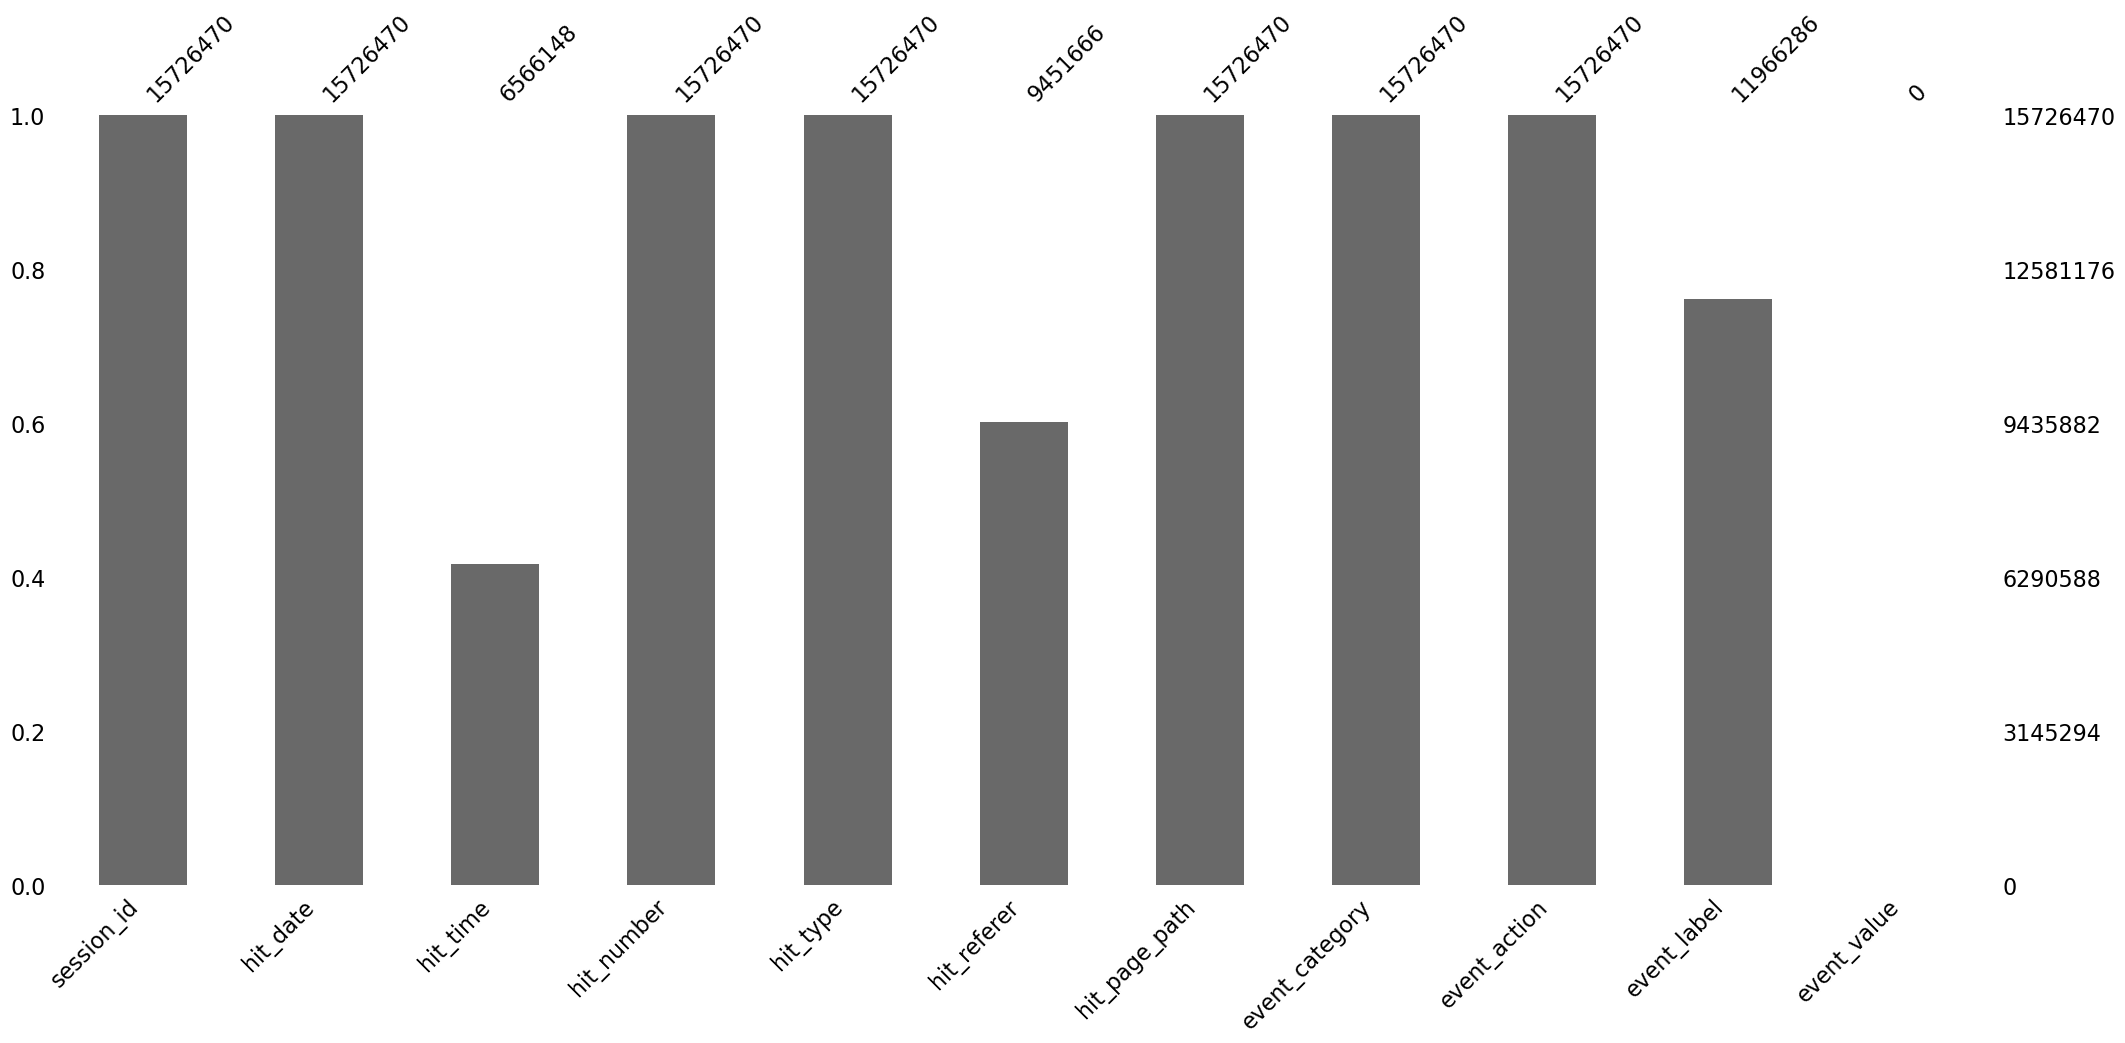

In [35]:
#Получим изображение, на котором отображаются наиболее проседающие по заполненным значениям признаки
import missingno as msno
msno.bar(ga_hits)

<Axes: >

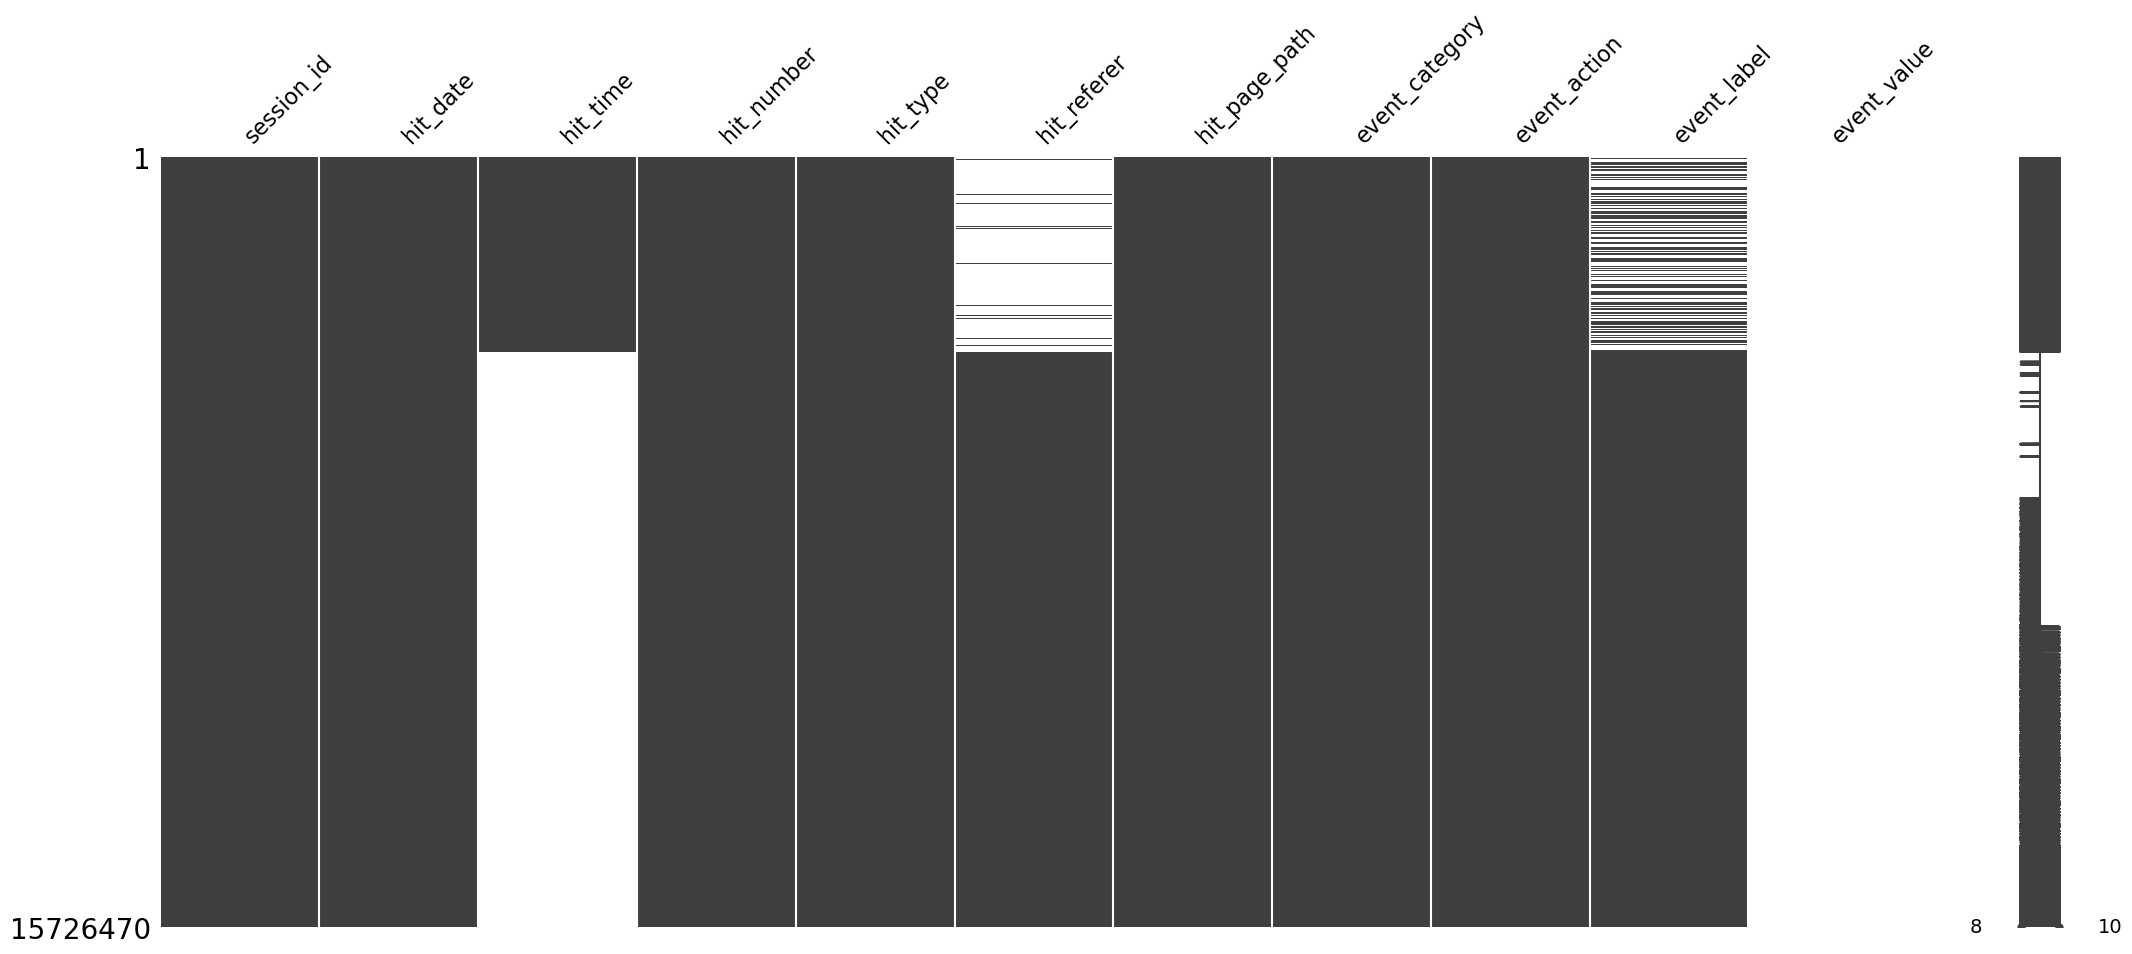

In [36]:
msno.matrix(ga_hits)

In [37]:
#Выведем процент пропущенных значений в каждом признаке
missing_values = ((ga_hits.isna().sum() / len(ga_hits)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64

In [38]:
#Видим, что event_value полностью пуст, но надо это проверить более точно
ga_hits.event_value.value_counts(dropna = False)

event_value
NaN    15726470
Name: count, dtype: int64

Действительно, колонка пуста и её надо удалить.


In [39]:
ga_hits =ga_hits.drop(columns = ['event_value', 'hit_type'])
ga_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN


In [40]:
ga_hits.shape

(15726470, 9)

In [41]:
#Проверим, сколько полностью заполненных объектов во всём наборе данных с помощью dropna()
def print_useful_rows_info(ga_hits):
   print('Количество полностью заполненных объектов из всей выборки: ', len(ga_hits.dropna()))
   print('Процент полностью заполненных объектов из всей выборки: ', round(len(ga_hits.dropna()) / len(ga_hits) * 100, 2))

In [42]:
print_useful_rows_info(ga_hits)

Количество полностью заполненных объектов из всей выборки:  118953
Процент полностью заполненных объектов из всей выборки:  0.76


In [43]:
ga_hits.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
dtype: object

In [44]:
#event_ection_name = ['sub_car_claim_click', 'sub_car_claim_submit_click',
#'sub_open_dialog_click', 'sub_custom_question_submit_click',
#'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
#'sub_car_request_submit_click']

In [45]:
#for event_action in event_ection_name:
 # col_name = 'is_' + event_action
 # ga_hits[col_name] = ga_hits.apply(lambda x: 1 if x.event_action == event_action else 0, axis = 1)

In [46]:
#ga_hits.iloc[:,-7:]

In [47]:
ga_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN


In [48]:
ga_hits.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
dtype: object

In [49]:
#Приведём все целевые действия к одной колонке, где 1-действие сделано, 0- не сделано.
ga_hits['event_action'] = ga_hits.event_action.apply(lambda x: 1 if x in ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'] else 0)
ga_hits.head(10)

,session_id,hit_date,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,0,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,0,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,0,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,0,NaN
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,NaN,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,0,NaN
6,281215510786615563.1640245516.1640245516,2021-12-23,911854.0,102,NaN,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,0,NaN
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,NaN,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,0,NaN
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,0,NaN
9,2692901778487480807.1640206845.1640206845,2021-12-23,0.0,1,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,0,NaN


In [50]:
ga_hits.shape

(15726470, 9)

In [51]:
#ga_sessions = pd.read_csv(r'C:\Users\1\Documents\ФИНАЛЬНАЯ РАБОТА\ga_sessions.csv')
#ga_sessions.head(10)


In [52]:
chunksize = 10**5
chunks = pd.read_csv(r'C:\Users\1\Documents\ФИНАЛЬНАЯ РАБОТА\ga_sessions.csv', chunksize=chunksize)
ga_sessions = pd.concat(chunks, ignore_index=True)

C:\Users\1\AppData\Local\Temp\ipykernel_7924\2696910225.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.concat(chunks, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_7924\2696910225.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.concat(chunks, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_7924\2696910225.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.concat(chunks, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_7924\2696910225.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.concat(chunks, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_7924\2696910225.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or 

In [53]:
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow


In [54]:
ga_sessions.shape

(1860042, 18)

In [55]:
ga_sessions.describe()

,visit_number
count,1.860042e+06
mean,2.712804e+00
std,1.182907e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,5.640000e+02


In [56]:
#Посмотрим, есть ли в датасете дублирующиеся данные
ga_sessions[ga_sessions.duplicated(keep=False)].shape[0] == 0

True

Так как на выходе True, то дублирующихся значений в датасете нет.

In [57]:
#отфильтруем только те строки, которые помечены как дублирующиеся
ga_sessions[ga_sessions.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [58]:
#Удалим лишние строки(повторяющиеся)
#ga_sessions = ga_sessions.drop_duplicates(inplace = True)
#ga_sessions

Убедились, что повторяющихся строк нет в датасете.

Переходим к поиску пропущенных значений.

In [59]:
#Выведем информацию о датасете с помощью info
print('Информация о выборке:\n')
ga_sessions.info()
# Почему-то нет колонки Non-Null Count, но это не значит, что пропущенных значений нет.

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [60]:
ga_sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')

In [61]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

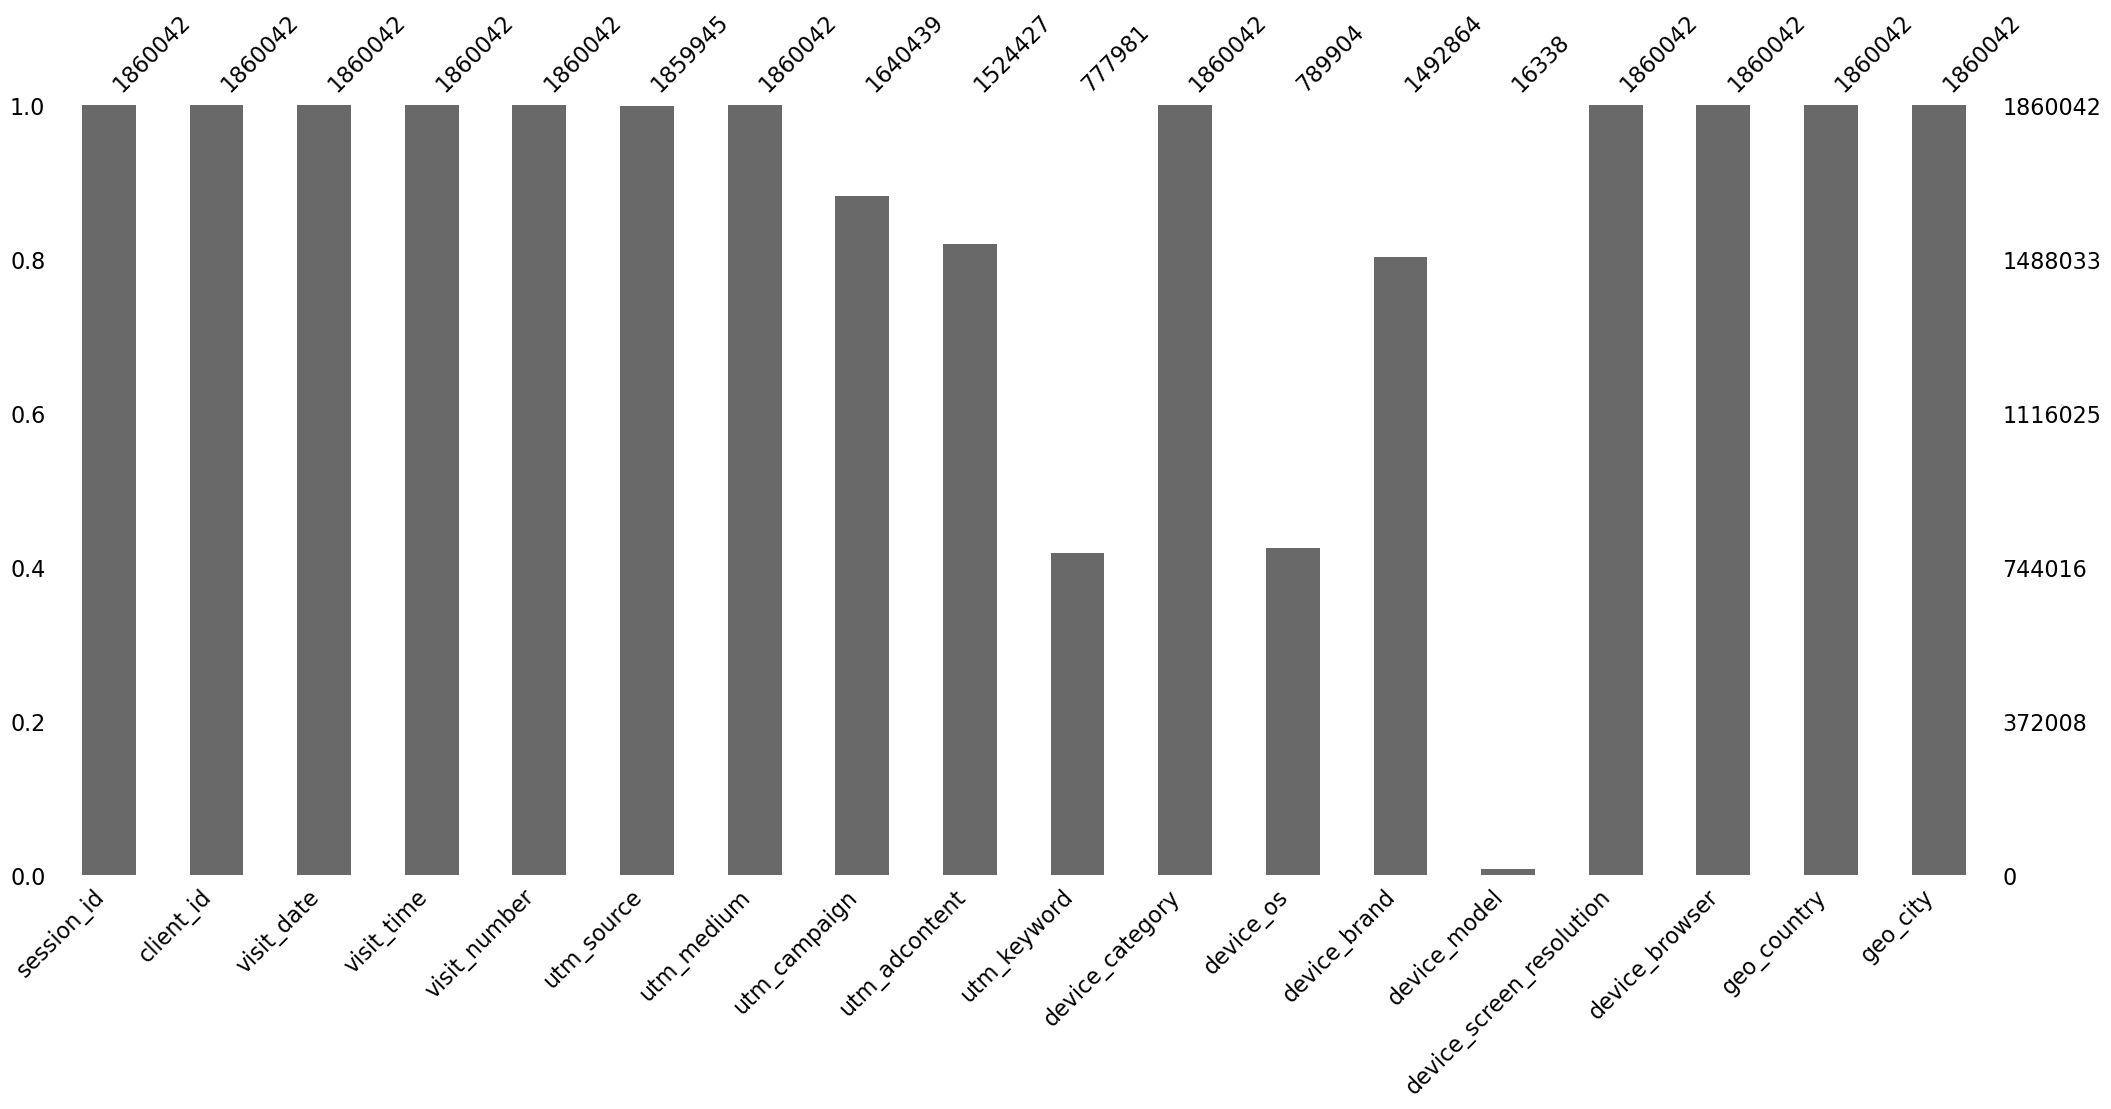

In [62]:
#Получим изображение, на котором отображаются наиболее проседающие по заполненным значениям признаки
import missingno as msno
msno.bar(ga_sessions)

In [63]:
#Видно, что столбец device_model можно удалить.
ga_sessions = ga_sessions.drop(columns=['device_model'])

In [64]:
ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow


In [65]:
ga_sessions.shape

(1860042, 17)

Вместо колонки 'utm_source' нужно создать колонку is_social, в которой указать 1 - если данные пришли из соц сетей  и 0, если не из них. Соц сети вот в этих значениях ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                                                 #    'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                                                  #   'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm

In [66]:
#Посмотрим на количество уникальных значений в колонке utm_source
ga_sessions['utm_source'].nunique()

293

In [67]:
#Выведем эти значения
ga_sessions['utm_source'].unique()

array(['ZpYIoDJMcFzVoPFsHGJL', 'MvfHsxITijuriZxsqZqt',
       'kjsLglQLzykiRbcDiGcD', 'TxKUcPpthBDPieTGmVhx',
       'fDLlAcSmythWSCVMvqvL', 'gVRrcxiDQubJiljoTbGm',
       'SzZERoLMmrEUEhDaYcyN', 'BHcvLfOaCWvWTykYqHVe',
       'klTrhUaShgnjIbaPmqjc', 'ghoaGAksqhKomdFrxgyJ',
       'vFcAhRxLfOWKhvxjELkx', 'QxAxdyPLuQMEcrdZWdWb',
       'nSReTmyFtbSjlPrTKoaX', 'ISrKoXQCxqqYvAZICvjs',
       'hTjLvqNxGggkGnxSCaTm', 'RmEBuqrriAfAVsLQQmhk',
       'IZEXUFLARCUMynmHNBGo', 'bByPQxmDaMXgpHeypKSM',
       'jaSOmLICuBzCFqHfBdRg', 'PlbkrSYoHuZBWfYjYnfw',
       'dGlVSdmIlgWDyOPjfwwy', 'gDBGzjFKYabGgSPZvrDH',
       'NGNkCWwKgYFmiCCeZVxg', 'GpAkIXsclxDGyILfNlrR',
       'oZCzWSykfixnjMPDNjSU', 'dyicZQGoeASogoSafjEh',
       'fgymSoTvjKPEgaIJqsiH', 'aXQzDWsJuGXeBXexNHjc',
       'fbFKcMumlScApQMqFIqp', 'eLzNJHzPelJpEyBwMrKo',
       'ZHCJROlbqnkXTqIuVxnm', 'iNFgfQPqHPBuvGCYtrQE',
       'nmfptFmSirEqNzAzqbXA', 'maiZOsuEAMdeoRVsYoFk',
       'HbolMJUevblAbkHClEQa', 'cAqxcRdSSFAyCPUxQHqy',
       'ge

In [68]:
ga_sessions['is_social'] = ga_sessions.utm_source.apply(lambda x: 1 if x in ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                                                     'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                                                     'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'] else 0)
ga_sessions =ga_sessions.drop(columns=['utm_source'])
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_social
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,1
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg,0
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg,0
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow,0
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0


In [69]:
ga_sessions['utm_medium'].nunique()

56

In [70]:
ga_sessions['utm_medium'].unique()

array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
       'stories', 'blogger_channel', 'blogger_stories', 'email', 'app',
       'vk_smm', 'cpv', 'push', 'partner', 'tg', 'cpa', 'post',
       'smartbanner', 'info_text', 'outlook', 'clicks', 'landing',
       'blogger_header', 'qr', '(not set)', 'fb_smm', 'nkp', 'google_cpc',
       'sms', 'article', 'users_msk', 'static', 'ok_smm', 'cbaafe',
       'Sbol_catalog', 'landing_interests', 'yandex_cpc', 'web_polka',
       'linktest', 'sber_app', 'CPM', 'medium', 'tablet', 'promo_sbol',
       'reach', 'desktop', 'dom_click', 'social', 'catalogue',
       'main_polka', 'last', 'link', 'qrcodevideo', 'promo_sber'],
      dtype=object)

In [71]:
#ga_sessions['utm_source'].nunique()

In [72]:
# Вместо колорнки ['utm_medium'] создадим колонку is_organic, в которой 1-это органический трафик, 0 - другой.
ga_sessions['is_organic'] = ga_sessions.utm_medium.apply(lambda x: 1 if x in ['organic', 'referral', '(none)'] else 0)
ga_sessions =ga_sessions.drop(columns=['utm_medium'])
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_social,is_organic
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,1,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0,0
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg,0,1
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg,0,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg,0,0
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow,0,0
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0,0


#Сделайте колонку device_os, где если телефон Apple и устройство мобильное, то ос - ios, если не apple, но устройство мобильное, то андроид

In [73]:
#Выведем количество уникальных значений колонки device_os
ga_sessions['device_os'].nunique()

13

In [74]:
#Посмотрим на эти уникальные значения
ga_sessions['device_os'].unique()

array(['Android', nan, 'iOS', 'Windows', 'Linux', 'Macintosh',
       '(not set)', 'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS',
       'Samsung', 'Windows Phone', 'Nokia'], dtype=object)

In [75]:
#ga_sessions['device_os'] = ga_sessions.device_os.apply(lambda x: "ios" if x in ['Apple','mobile'] else ("Android" if x in ['~Apple',' mobile'])
ga_sessions['device_os'] = ga_sessions.apply(lambda row: 'iOS' if row['device_brand'] == 'Apple' and row['device_category'] == 'mobile' else ('Android' if row['device_category'] == 'mobile' else None), axis=1)
#ga_sessions =ga_sessions.drop(columns=['device_category'])
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_social,is_organic
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,1,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,NaN,NaN,NaN,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,0
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,iOS,Apple,375x812,Safari,Russia,Saint Petersburg,0,1
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,None,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg,0,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,360x640,Chrome,Russia,Saint Petersburg,0,0
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow,0,0
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Samsung,412x915,Chrome,Russia,Moscow,0,0


In [76]:
#Вместо колонки 'device_category' сделайте колонку is_mobile, в которой покажите откуда идет трафик с мобильного устройства или нет.
ga_sessions['device_category'].nunique()

3

In [77]:
ga_sessions['device_category'].unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [78]:
ga_sessions['is_mobile'] = ga_sessions.device_category.apply(lambda x: 1 if x in ['mobile'] else 0)
ga_sessions =ga_sessions.drop(columns=['device_category'])
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_campaign,utm_adcontent,utm_keyword,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_social,is_organic,is_mobile
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0,0,1
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,1,0,1
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0,1
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,0,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,NaN,NaN,NaN,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0,0,1
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,iOS,Apple,375x812,Safari,Russia,Saint Petersburg,0,1,1
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,None,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg,0,0,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,Android,Samsung,360x640,Chrome,Russia,Saint Petersburg,0,0,1
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,iOS,Apple,390x844,Safari,Russia,Moscow,0,0,1
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,Android,Samsung,412x915,Chrome,Russia,Moscow,0,0,1


In [79]:
#Вместо колонки 'geo_city' сделайте колонку 'is_represented', где Москва и подмосковье будут 1, остальное 0.

In [80]:
#Выведем количество уникальных значений колонки geo_city
ga_sessions['geo_city'].nunique()

2548

In [81]:
# Выведем уникальные значения колонки gte_city
ga_sessions['geo_city'].unique()

array(['Zlatoust', 'Moscow', 'Krasnoyarsk', ..., 'Rosenheim', 'Palatka',
       'Hagenow'], dtype=object)

In [82]:
ga_sessions['is_represented'] = ga_sessions.geo_city.apply(lambda x: 1 if x in ['Moscow'] else 0)
ga_sessions =ga_sessions.drop(columns=['geo_city'])
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_campaign,utm_adcontent,utm_keyword,device_os,device_brand,device_screen_resolution,device_browser,geo_country,is_social,is_organic,is_mobile,is_represented
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,Android,Huawei,360x720,Chrome,Russia,0,0,1,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,Android,Samsung,385x854,Samsung Internet,Russia,1,0,1,1
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,Android,Huawei,360x720,Chrome,Russia,0,0,1,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,Android,Xiaomi,393x786,Chrome,Russia,0,0,1,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,NaN,NaN,NaN,Android,Xiaomi,393x786,Chrome,Russia,0,0,1,1
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,iOS,Apple,375x812,Safari,Russia,0,1,1,0
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,None,Lenovo,602x1029,YaBrowser,Russia,0,0,0,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,Android,Samsung,360x640,Chrome,Russia,0,0,1,0
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,iOS,Apple,390x844,Safari,Russia,0,0,1,1
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,Android,Samsung,412x915,Chrome,Russia,0,0,1,1


In [83]:
#Подумайте как упростить колонку geo_country
#Посмотрим на уникальные значения этой колонки
ga_sessions['geo_country'].nunique()

166

In [84]:
ga_sessions['geo_country'].unique()

array(['Russia', 'United States', 'Ukraine', 'Italy', 'Belarus',
       '(not set)', 'Sweden', 'Australia', 'Kazakhstan', 'Estonia',
       'Azerbaijan', 'Brazil', 'Montenegro', 'Bulgaria', 'Georgia',
       'Uzbekistan', 'Tajikistan', 'Ireland', 'Cyprus',
       'United Arab Emirates', 'Germany', 'United Kingdom', 'Netherlands',
       'Armenia', 'Spain', 'Finland', 'Turkey', 'Poland', 'Kyrgyzstan',
       'Serbia', 'India', 'Bangladesh', 'Latvia', 'Seychelles', 'Norway',
       'Moldova', 'Argentina', 'Guatemala', 'Lithuania', 'Iraq', 'Canada',
       'Greece', 'Antigua & Barbuda', 'France', 'Slovakia', 'Palestine',
       'Saudi Arabia', 'Iran', 'Czechia', 'Austria', 'Singapore',
       'Indonesia', 'Dominican Republic', 'Denmark', 'Albania',
       'Switzerland', 'China', 'Portugal', 'Israel', 'Hungary',
       'Slovenia', 'Iceland', 'Maldives', 'Mexico', 'Wallis & Futuna',
       'Egypt', 'Guadeloupe', 'South Korea', 'Uganda',
       'Bosnia & Herzegovina', 'Thailand', 'Romania', 

Так как Сберавтоподписка работает только в России, то остальные страны может удалить или нет? Или сделать 1-если Россия и 0- все остальные страны

In [85]:
ga_sessions['geo_country'] = ga_sessions.geo_country.apply(lambda x: 1 if x in ['Russia'] else 0)
#ga_sessions =ga_sessions.drop(columns=['device_category'])
ga_sessions.head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_campaign,utm_adcontent,utm_keyword,device_os,device_brand,device_screen_resolution,device_browser,geo_country,is_social,is_organic,is_mobile,is_represented
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,Android,Huawei,360x720,Chrome,1,0,0,1,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,Android,Samsung,385x854,Samsung Internet,1,1,0,1,1
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,Android,Huawei,360x720,Chrome,1,0,0,1,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,Android,Xiaomi,393x786,Chrome,1,0,0,1,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,NaN,NaN,NaN,Android,Xiaomi,393x786,Chrome,1,0,0,1,1
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,iOS,Apple,375x812,Safari,1,0,1,1,0
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,None,Lenovo,602x1029,YaBrowser,1,0,0,0,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,Android,Samsung,360x640,Chrome,1,0,0,1,0
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,iOS,Apple,390x844,Safari,1,0,0,1,1
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,Android,Samsung,412x915,Chrome,1,0,0,1,1


In [86]:
#Выведем процент пропущенных значений в каждом признаке
missing_values1 = ((ga_sessions.isna().sum() / len(ga_sessions)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values1

Процент пропущенных значений:


session_id                   0.000000
is_organic                   0.000000
is_social                    0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
is_mobile                    0.000000
is_represented               0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   20.707651
utm_keyword                 58.174009
dtype: float64

In [87]:
#Объединение датафреймов
df_full = ga_hits.merge(ga_sessions, how='inner', on='session_id').reset_index(drop=True)
df_full.head(10)

,session_id,hit_date,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,client_id,...,utm_keyword,device_os,device_brand,device_screen_resolution,device_browser,geo_country,is_social,is_organic,is_mobile,is_represented
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
1,5639623078712724064.1640254056.1640254056,2021-12-23,290095.0,12,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
2,5639623078712724064.1640254056.1640254056,2021-12-23,294857.0,18,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
3,5639623078712724064.1640254056.1640254056,2021-12-23,295591.0,20,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
4,5639623078712724064.1640254056.1640254056,2021-12-23,290039.0,8,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
5,5639623078712724064.1640254056.1640254056,2021-12-23,613691.0,32,NaN,sberauto.com/cars?utm_source_initial=google&ut...,cars,0,pzAKUYdRKNEUXxxBFUPX,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
6,5639623078712724064.1640254056.1640254056,2021-12-23,3236.0,3,NaN,sberauto.com/cars?utm_source_initial=google&ut...,search_form,0,ghOrjqpgskpGHSFfBBsi,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
7,5639623078712724064.1640254056.1640254056,2021-12-23,641265.0,36,NaN,sberauto.com/cars?utm_source_initial=google&ut...,sap_search_form,0,jOPfFITDxmtSmbGMhcGw,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
8,5639623078712724064.1640254056.1640254056,2021-12-23,294847.0,15,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
9,5639623078712724064.1640254056.1640254056,2021-12-23,531828.0,26,NaN,sberauto.com/cars/all/volvo/s90/a231b204?utm_s...,card_web,0,NaN,1313077071.164025,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0


In [88]:
df_full.shape

(15685219, 25)

In [89]:
#Посмотрим на получившийся объединённый датасат
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   hit_date                  object 
 2   hit_time                  float64
 3   hit_number                int64  
 4   hit_referer               object 
 5   hit_page_path             object 
 6   event_category            object 
 7   event_action              int64  
 8   event_label               object 
 9   client_id                 object 
 10  visit_date                object 
 11  visit_time                object 
 12  visit_number              int64  
 13  utm_campaign              object 
 14  utm_adcontent             object 
 15  utm_keyword               object 
 16  device_os                 object 
 17  device_brand              object 
 18  device_screen_resolution  object 
 19  device_browser            object 
 20  geo_country           

<Axes: >

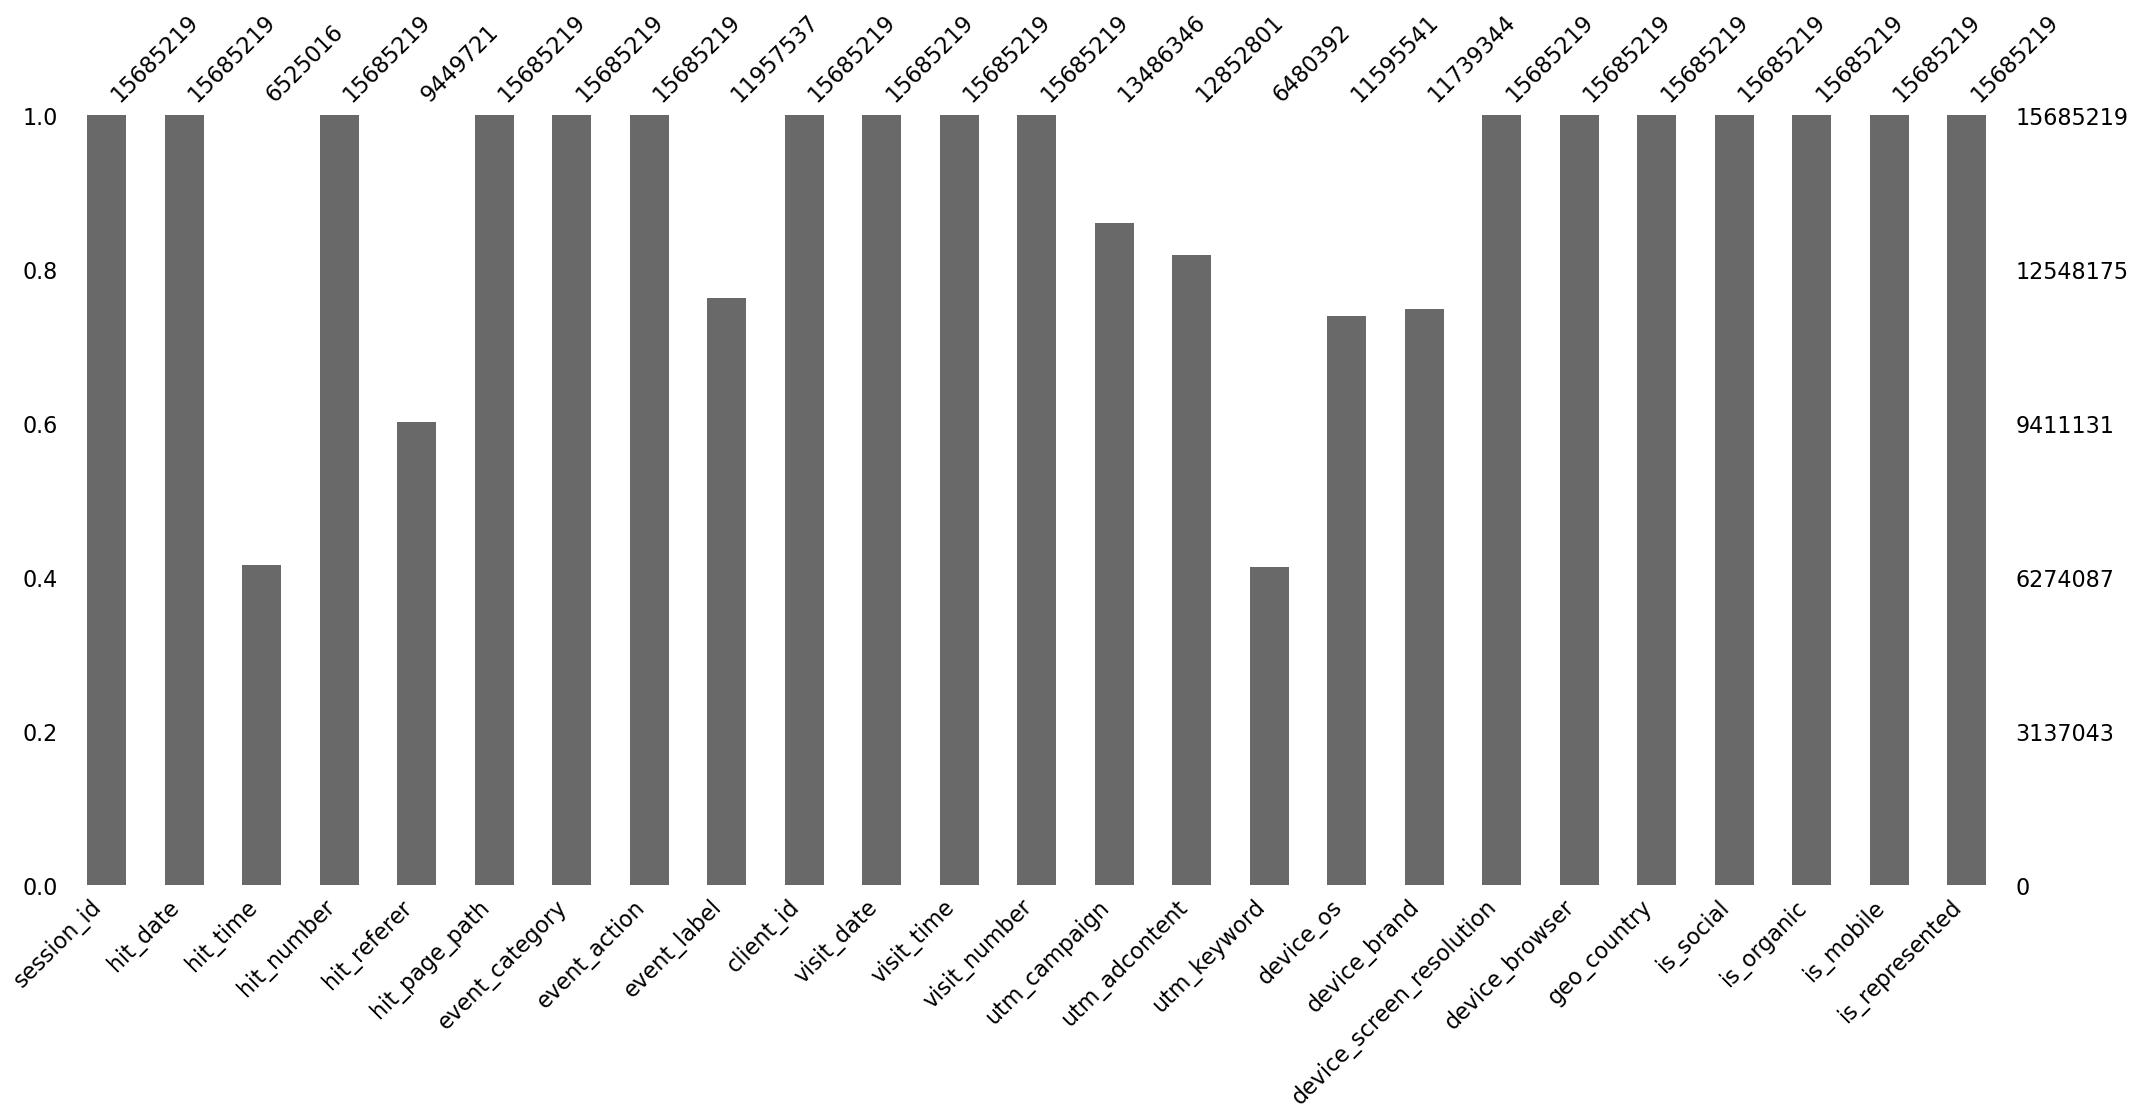

In [90]:
# Визуализируем столбцы данных объединённого датасета
import missingno as msno
msno.bar(df_full)

<Axes: >

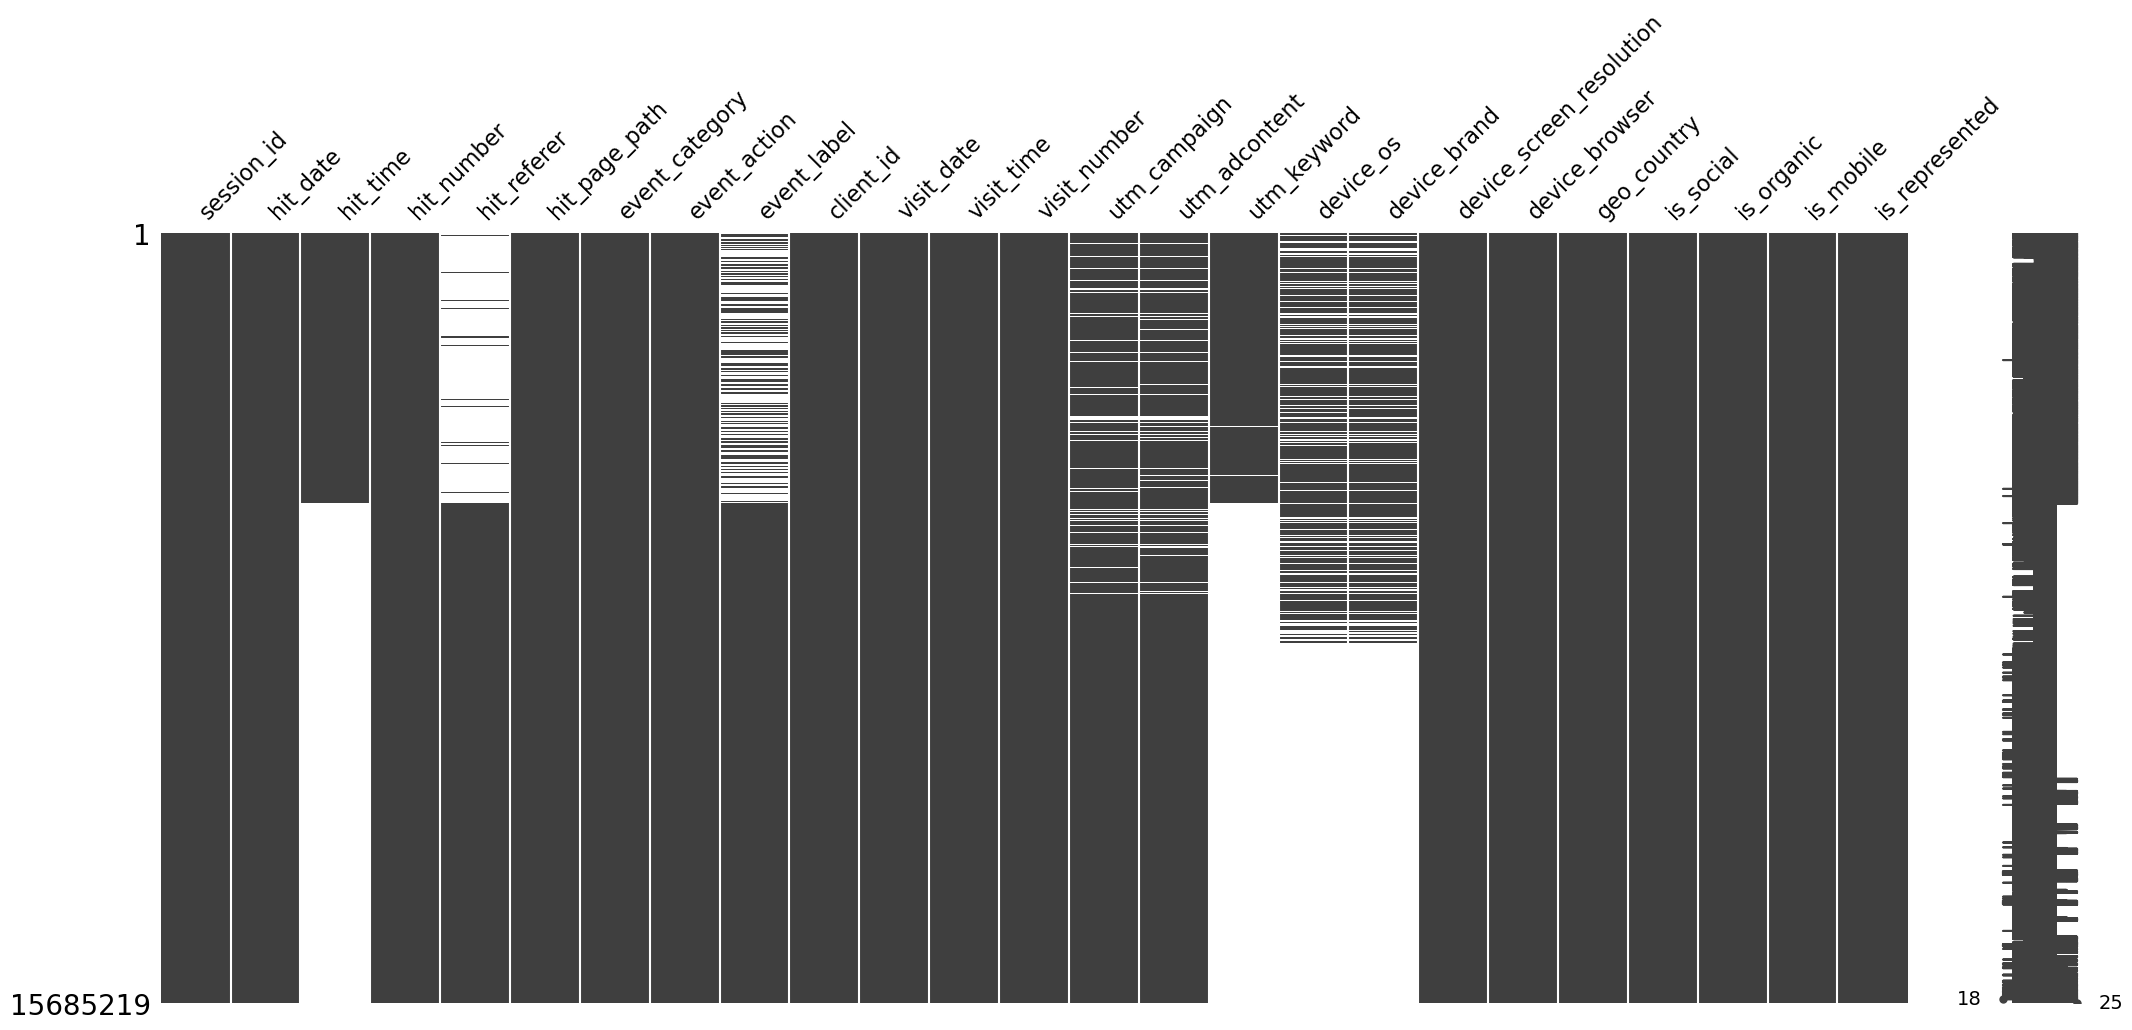

In [91]:
msno.matrix(df_full)

In [92]:
#df_full.hit_referer.values.tolist()

In [93]:
#df_full.hit_page_path.values.tolist()

In [94]:
#df_full.hit_referer.values.tolist()

In [95]:
#df_full.event_label.values.tolist()

In [96]:
#df_full.utm_campaign.values.tolist()

In [97]:
#df_full.utm_adcontent.values.tolist()

In [98]:
#df_full.utm_keyword.values.tolist()

In [99]:
#df_full.device_os.values.tolist()

In [100]:
#df_full.device_brand.values.tolist()

In [101]:
df_full.event_label.dtype

dtype('O')

In [102]:
#Посмотрим ещё раз на процент пропущенных значений в каждом признаке в объединённом датасете
missing_values2 = ((df_full.isna().sum() / len(df_full)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values2

Процент пропущенных значений:


session_id                   0.000000
is_organic                   0.000000
is_social                    0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
is_mobile                    0.000000
visit_time                   0.000000
visit_date                   0.000000
visit_number                 0.000000
event_action                 0.000000
event_category               0.000000
hit_page_path                0.000000
hit_number                   0.000000
hit_date                     0.000000
client_id                    0.000000
is_represented               0.000000
utm_campaign                14.018759
utm_adcontent               18.057880
event_label                 23.765572
device_brand                25.156646
device_os                   26.073452
hit_referer                 39.753975
hit_time                    58.400224
utm_keyword                 58.684721
dtype: float64

Можно удалить колонку hit_time так как там 58% пропущенных данных.

In [103]:
df_full = df_full.drop(columns=['hit_time'])

In [104]:
#Проверим, насколько заполнены данные
print_useful_rows_info(df_full)

Количество полностью заполненных объектов из всей выборки:  112546
Процент полностью заполненных объектов из всей выборки:  0.72


Рассмотрим отдельно каждый незаполненный столбец.
Выведем описательные статистики по отдельности

<Axes: >

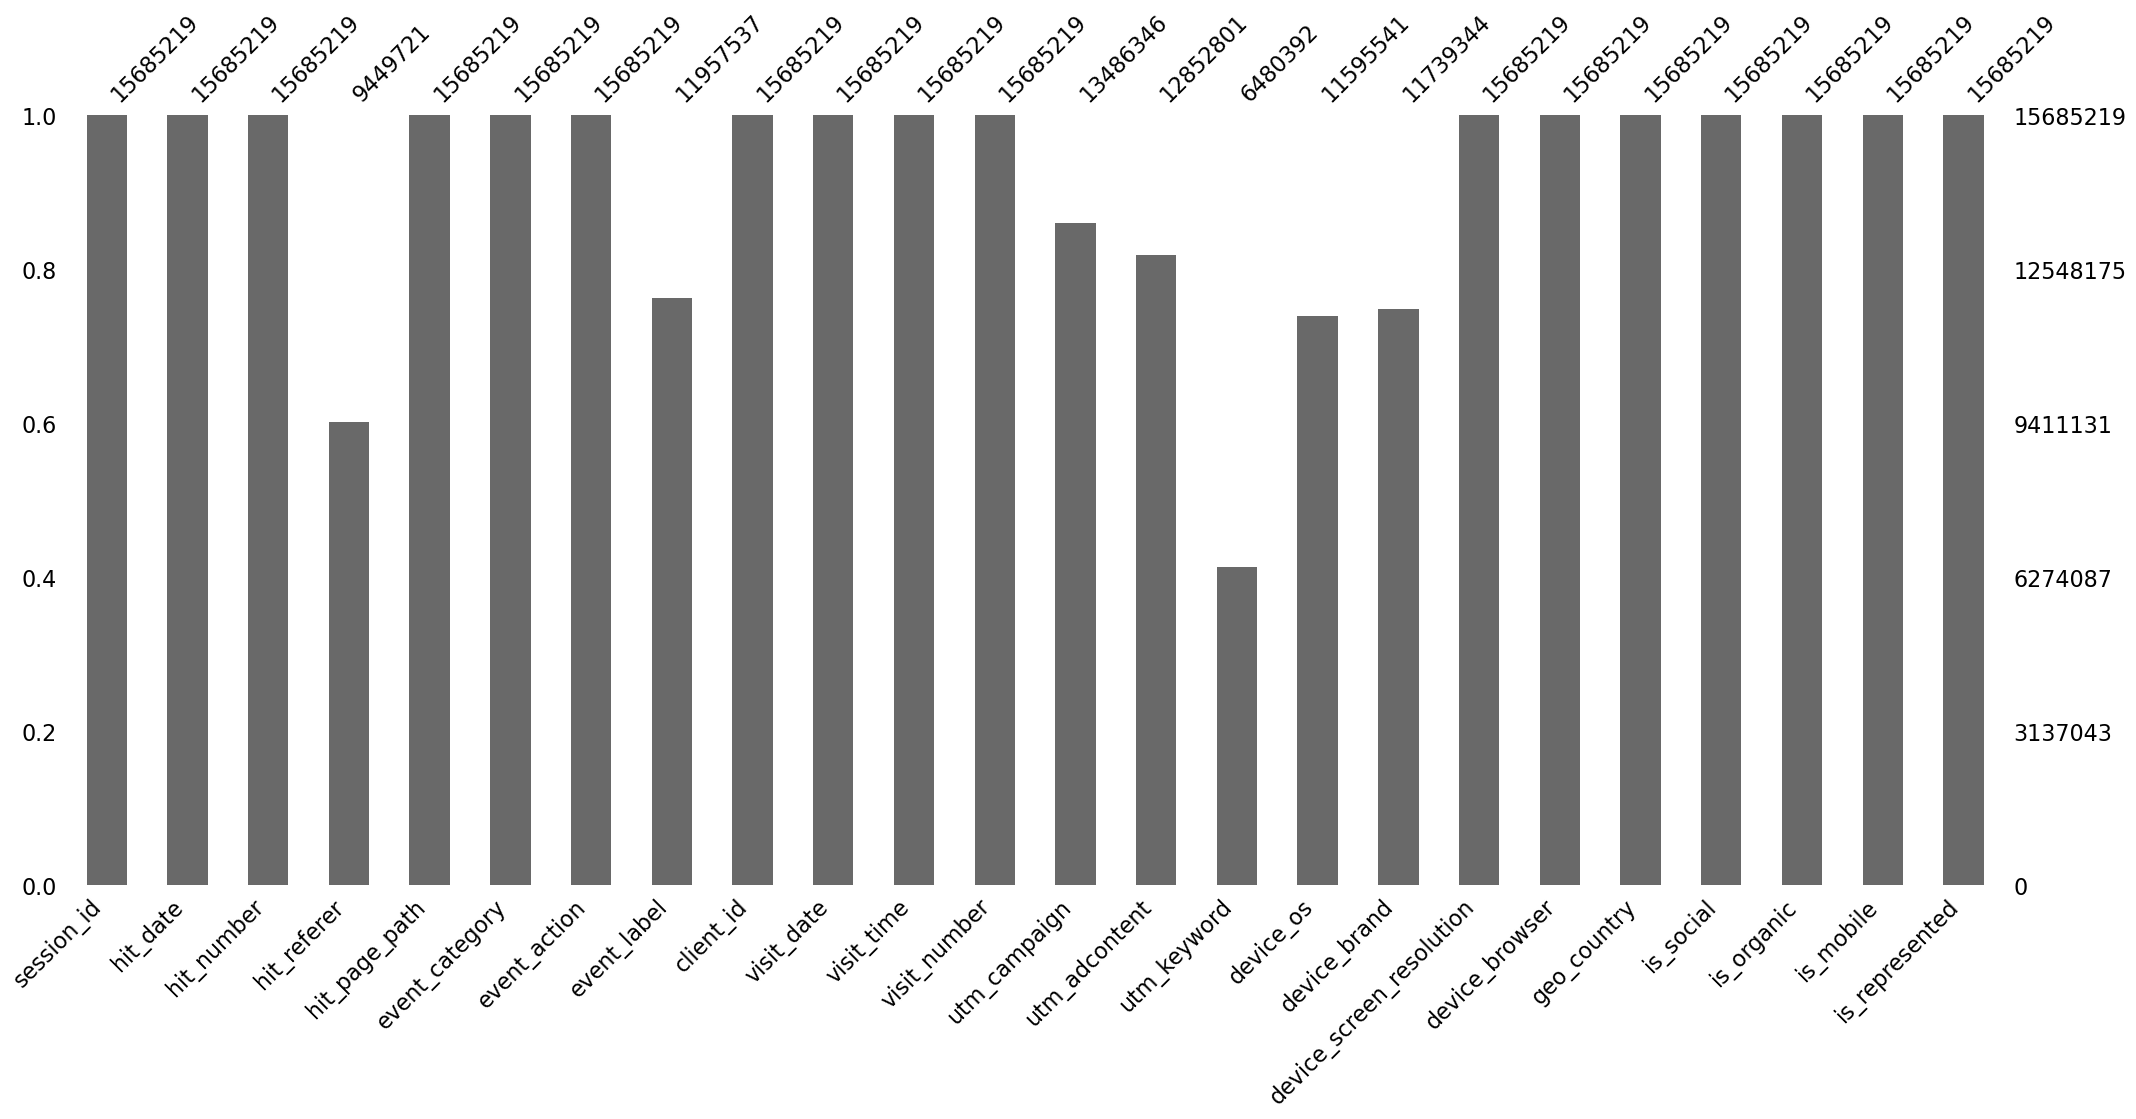

In [105]:
msno.bar(df_full)

In [106]:
df_full.utm_campaign.describe() # рекламная компания

count                 13486346
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                   5166521
Name: utm_campaign, dtype: object

In [107]:
#Пропущенные значения в рекламной компании  можно заполнить 'other'
df_full.utm_campaign = df_full.utm_campaign .fillna('other')

In [108]:
df_full.utm_adcontent.describe() # реклама

count                 12852801
unique                     280
top       JNHcPlZPxEMWDnRiyoBf
freq                   9647665
Name: utm_adcontent, dtype: object

In [109]:
#Пропущенные значения в рекламе  можно заполнить 'other'
df_full.utm_adcontent = df_full.utm_adcontent .fillna('other')

In [110]:
df_full.event_label.describe() #тег действия

count                 11957537
unique                   39777
top       KclpemfoHstknWHFiLit
freq                   6505347
Name: event_label, dtype: object

In [111]:
#Пропущенные значения в теге действия можно заполнить 'other'
df_full.event_label = df_full.event_label .fillna('other')

In [112]:
df_full.device_brand.describe()# марка устройства

count     11739344
unique         200
top          Apple
freq       4708652
Name: device_brand, dtype: object

In [113]:
df_full.device_brand = df_full.device_brand.fillna('other')

In [114]:
df_full.device_os.describe()# Операционная система

count     11595541
unique           2
top        Android
freq       6944235
Name: device_os, dtype: object

In [115]:
df_full.device_os = df_full.device_os.fillna('other')

In [116]:
df_full.hit_referer.describe() # источник события

count                  9449721
unique                   37826
top       HbolMJUevblAbkHClEQa
freq                   8879128
Name: hit_referer, dtype: object

In [117]:
#Пропущенные значения в источнике события можно заполнить 'other'
df_full.hit_referer = df_full.hit_referer.fillna('other')

<Axes: >

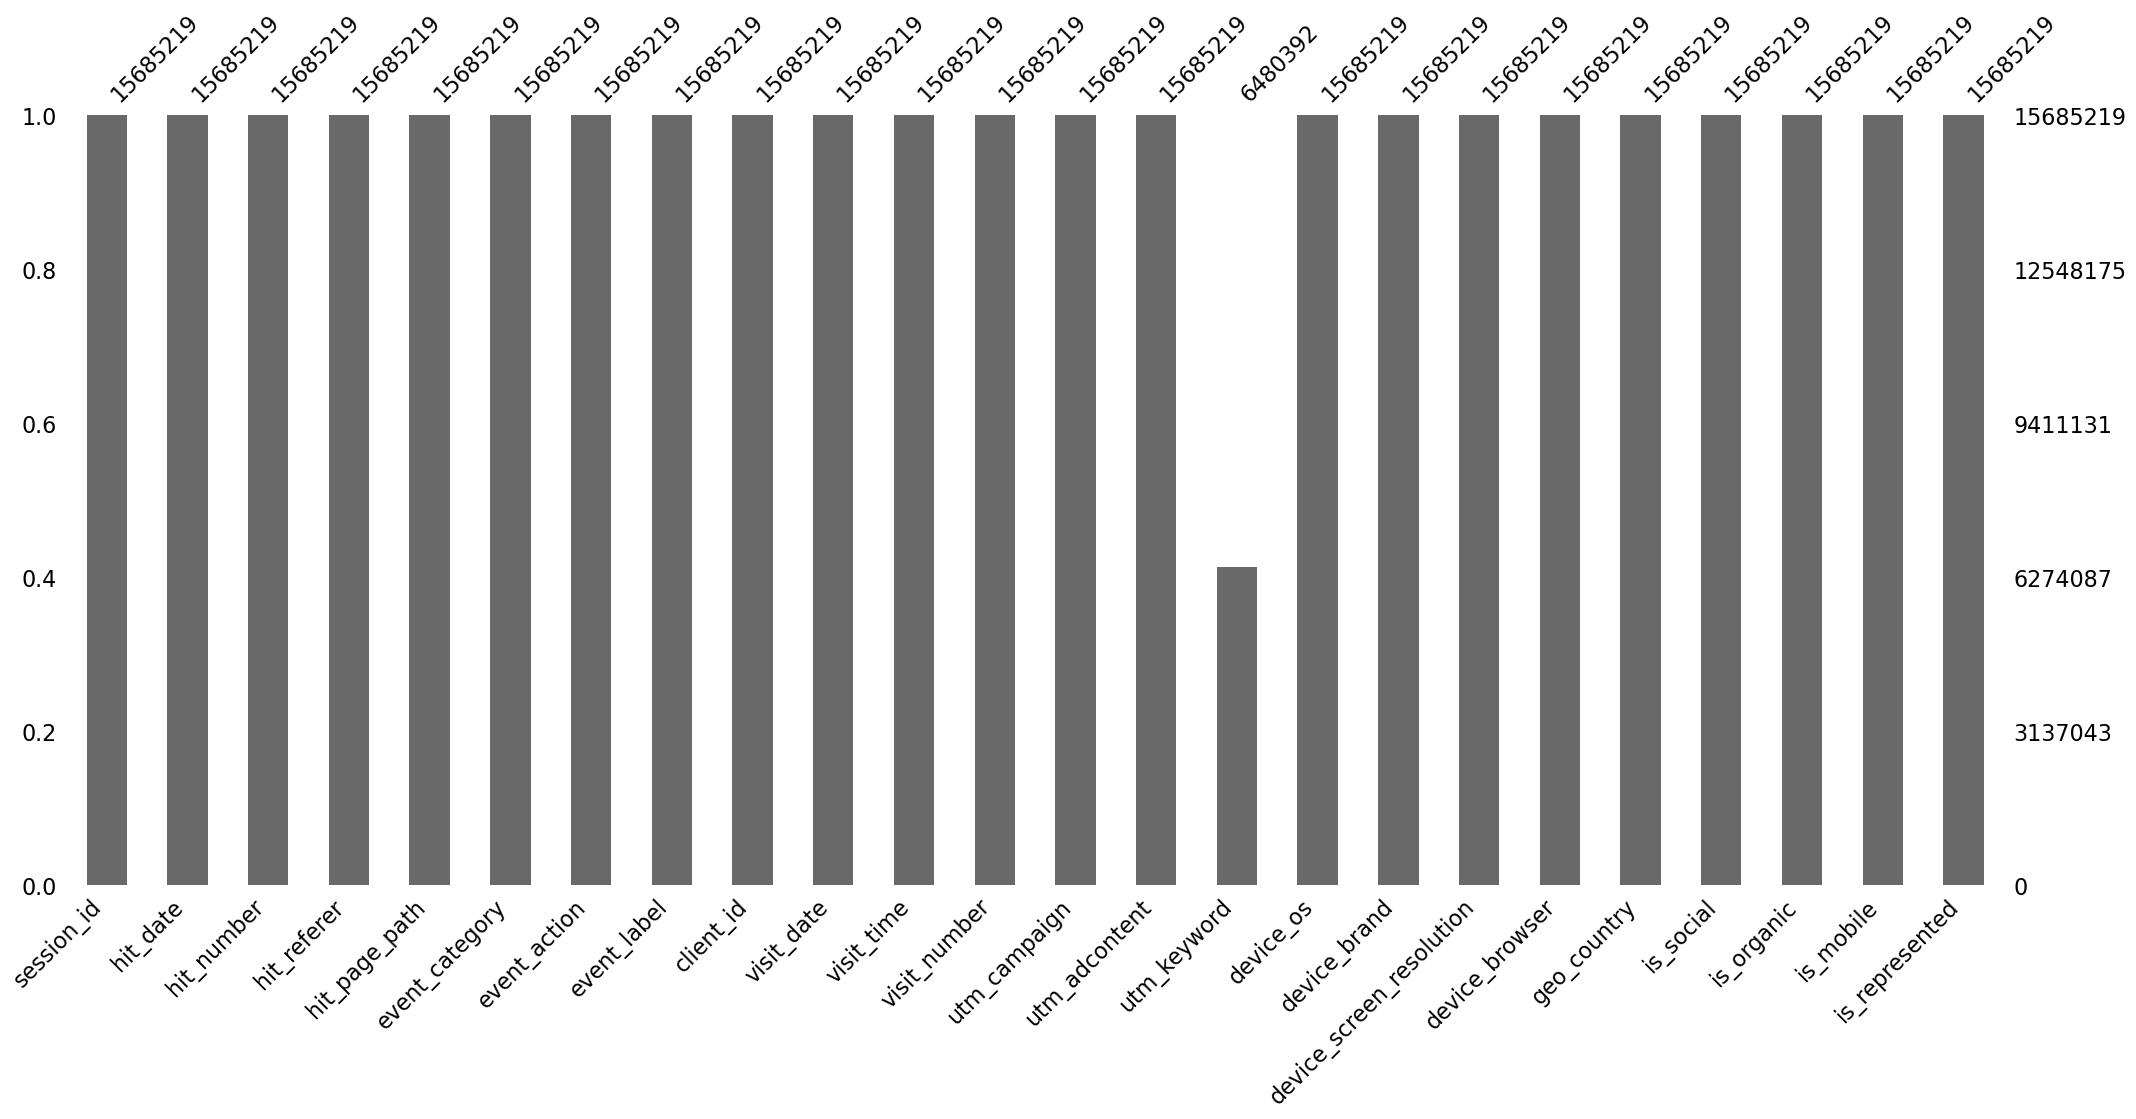

In [118]:
msno.bar(df_full)

In [119]:
#Проверим, насколько заполнены данные после всех преобразований
print_useful_rows_info(df_full)

Количество полностью заполненных объектов из всей выборки:  6480392
Процент полностью заполненных объектов из всей выборки:  41.32


In [120]:
#Заменим пропущенные значения на other
df_full.utm_keyword = df_full.utm_keyword .fillna('other')

<Axes: >

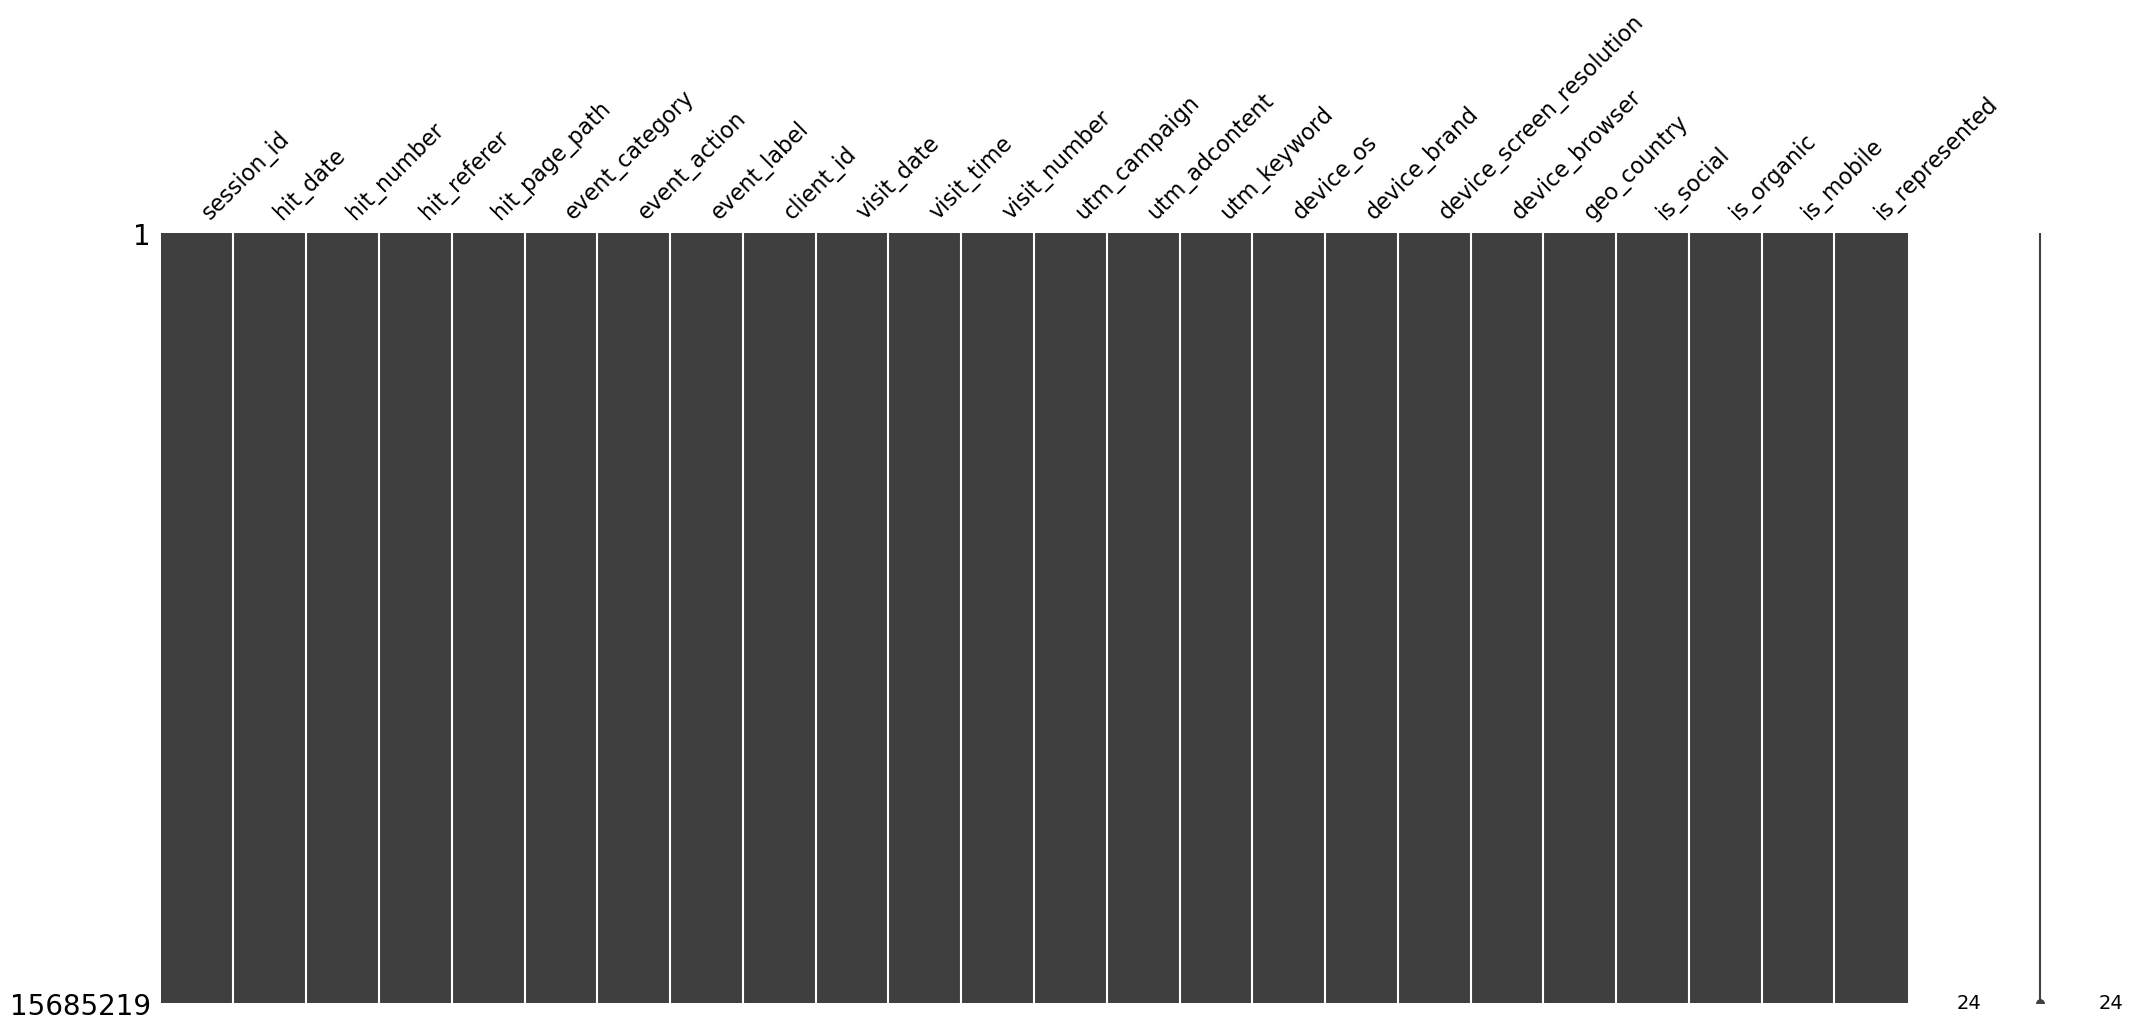

In [121]:
msno.matrix(df_full)

In [122]:
#Проверим, насколько заполнены данные после всех преобразований
print_useful_rows_info(df_full)

Количество полностью заполненных объектов из всей выборки:  15685219
Процент полностью заполненных объектов из всей выборки:  100.0


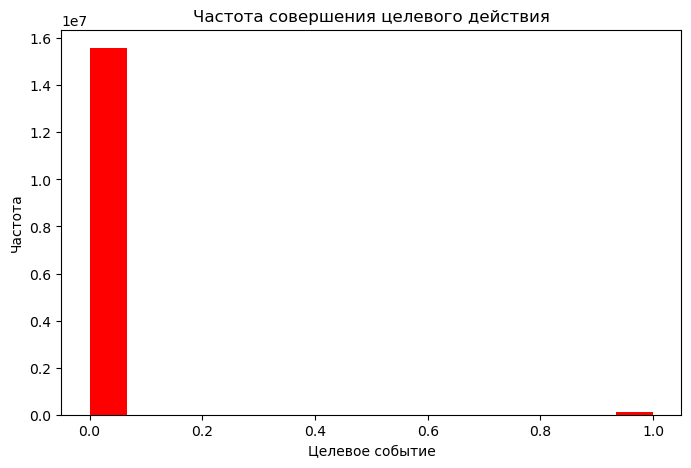

In [123]:
#Посмотрим на частоту совершения целевого действия
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df_full.event_action, bins=15, color='red')
plt.xlabel('Целевое событие')
plt.ylabel('Частота')
plt.title('Частота совершения целевого действия');

Видно, что целевых действий совершено очень мало. Как правило, так чаще всего и бывает.

In [124]:
#Считаем число целевых действий пользователя
df_client_actions = df_full.groupby(['client_id']).agg({'event_action': 'sum'}).reset_index().sort_values(by=['event_action'],
                                                                                                    ascending=False)

In [125]:
df_client_actions

,client_id,event_action
933541,1750498477.162945,1588
879024,1662528479.163042,474
625829,1216284533.16312,347
716974,1364722753.16178,209
304704,659274012.162212,170
...,...,...
447816,926624656.162184,0
447815,926619918.164075,0
447814,926619021.162429,0
447812,926615678.163814,0


C:\Users\1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


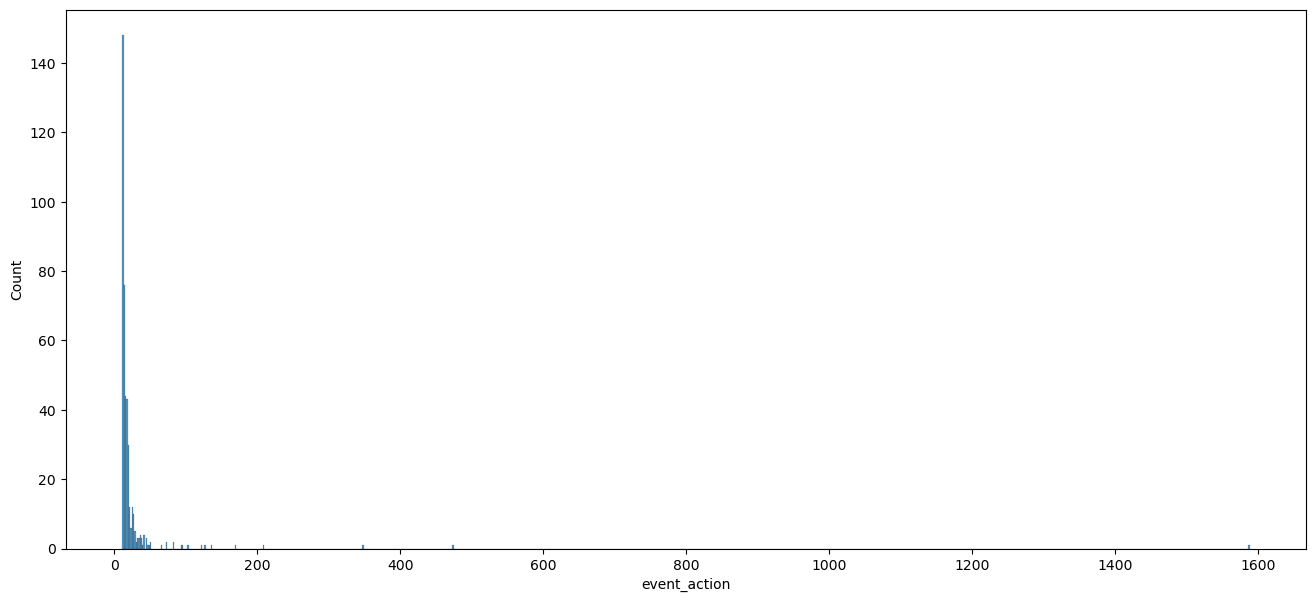

In [126]:
#Проверяем есть ли в нем число действий больше нормального для человека, например, больше 10 действий
import seaborn as sns
plt.figure(figsize = (16, 7))
sns.histplot(data = df_client_actions.loc[df_client_actions['event_action'] > 10], x = 'event_action')
plt.show()

In [127]:
#Видим, что лишние действия есть и убираем эти записи из датасета
df_full = df_full.loc[~df_full['client_id'].isin(df_client_actions.loc[df_client_actions['event_action'] > 10]['client_id'].unique().tolist())].reset_index(drop=True)

In [128]:
df_full.head()

,session_id,hit_date,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,client_id,visit_date,...,utm_keyword,device_os,device_brand,device_screen_resolution,device_browser,geo_country,is_social,is_organic,is_mobile,is_represented
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0,other,1313077071.164025,2021-12-23,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
1,5639623078712724064.1640254056.1640254056,2021-12-23,12,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,other,1313077071.164025,2021-12-23,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
2,5639623078712724064.1640254056.1640254056,2021-12-23,18,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,other,1313077071.164025,2021-12-23,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
3,5639623078712724064.1640254056.1640254056,2021-12-23,20,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,other,1313077071.164025,2021-12-23,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0
4,5639623078712724064.1640254056.1640254056,2021-12-23,8,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,other,1313077071.164025,2021-12-23,...,wvtWRwiRmvPIsSQuXnvd,Android,Huawei,360x780,Chrome,1,0,0,1,0


Если было слишком много визитов в сессии, то это явно работа ботов, нам эти данные брать не нужно. Поэтому нужно будет собрать число визитов по датам

In [129]:
df_visits = df_full.groupby(['visit_date']).agg({'session_id': 'count'}).reset_index().sort_values(by=['session_id'],
                                                                                                   ascending=False)

In [130]:
df_visits

,visit_date,session_id
4,2021-05-24,509076
215,2021-12-21,279186
5,2021-05-25,233498
126,2021-09-23,166194
6,2021-05-26,156056
...,...,...
65,2021-07-24,23159
3,2021-05-23,18314
2,2021-05-22,13608
0,2021-05-19,13090


Видно, что 24 мая 2021 года была особенно большая активность.

И посмотрим на графике их распределение по датам

In [131]:
import seaborn as sns

C:\Users\1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='visit_date', ylabel='session_id'>

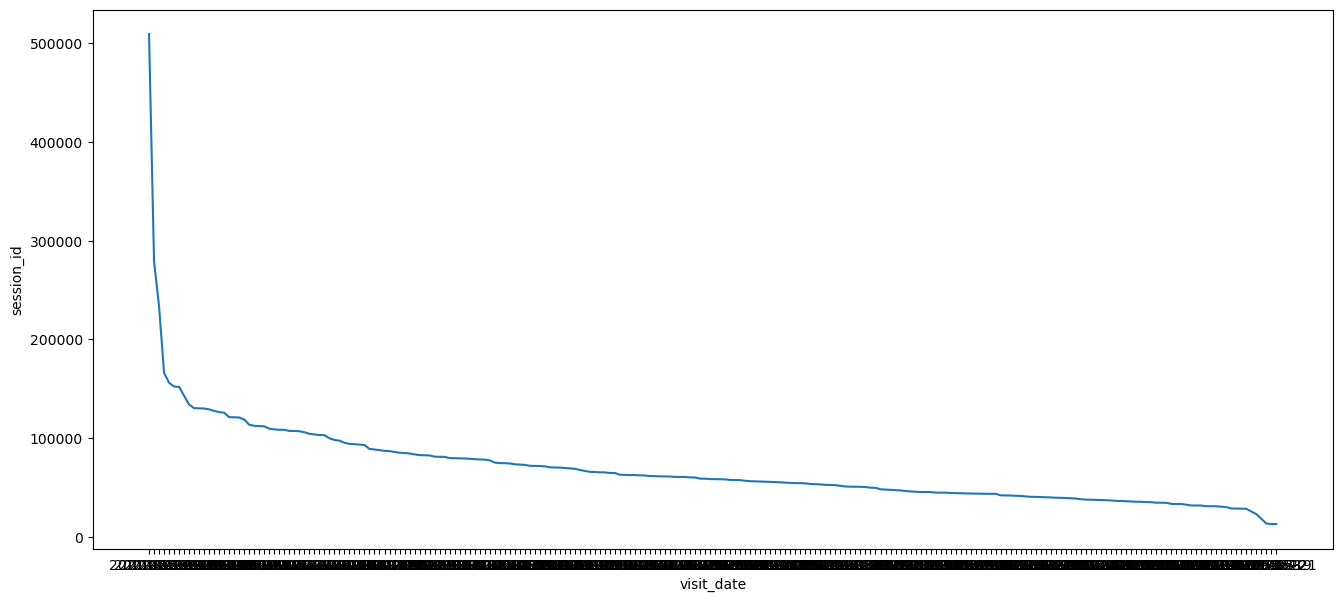

In [132]:
plt.figure(figsize=(16,7))
sns.lineplot(data=df_visits, x='visit_date', y='session_id')

Из графика видно, что в определённый период количество сессий резко возрастает по сравнению с другими днями, это является подозрительным. Поэтому нам нужно взять данные после этого дня.

In [133]:
df_visits.session_id.describe()

count       226.000000
mean      68889.243363
std       45683.291121
min       13039.000000
25%       43651.250000
50%       58591.000000
75%       82224.000000
max      509076.000000
Name: session_id, dtype: float64

In [134]:
from datetime import datetime
#df_full['visit_date'] = pd.to_datetime(df_full['visit_date'])

In [135]:
df_full['visit_date'] = df_full['visit_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [136]:
df_full['visit_time'] = pd.to_datetime(df_full['visit_time'])

C:\Users\1\AppData\Local\Temp\ipykernel_7924\748413899.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full['visit_time'] = pd.to_datetime(df_full['visit_time'])


In [137]:
df_full['visit_year'] = df_full['visit_date'].apply(lambda x: x.year)
df_full['visit_month'] = df_full['visit_date'].apply(lambda x: x.month)
df_full['visit_day'] = df_full['visit_date'].apply(lambda x: x.day)
df_full['visit_weekday'] = df_full['visit_date'].apply(lambda x: x.weekday())
df_full['visit_hour'] = df_full['visit_time'].apply(lambda x: x.hour)

In [138]:
df_full = df_full.loc[(df_full['visit_date'] > '2021-05-24')]

In [139]:
df_full.head()

,session_id,hit_date,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,client_id,visit_date,...,geo_country,is_social,is_organic,is_mobile,is_represented,visit_year,visit_month,visit_day,visit_weekday,visit_hour
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0,other,1313077071.164025,2021-12-23,...,1,0,0,1,0,2021,12,23,3,13
1,5639623078712724064.1640254056.1640254056,2021-12-23,12,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,other,1313077071.164025,2021-12-23,...,1,0,0,1,0,2021,12,23,3,13
2,5639623078712724064.1640254056.1640254056,2021-12-23,18,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,other,1313077071.164025,2021-12-23,...,1,0,0,1,0,2021,12,23,3,13
3,5639623078712724064.1640254056.1640254056,2021-12-23,20,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,0,other,1313077071.164025,2021-12-23,...,1,0,0,1,0,2021,12,23,3,13
4,5639623078712724064.1640254056.1640254056,2021-12-23,8,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,0,other,1313077071.164025,2021-12-23,...,1,0,0,1,0,2021,12,23,3,13


In [140]:
df_full.shape

(15001842, 29)

In [141]:
df_full['visit_date']

0          2021-12-23
1          2021-12-23
2          2021-12-23
3          2021-12-23
4          2021-12-23
              ...    
15568964   2021-12-23
15568965   2021-12-23
15568966   2021-12-23
15568967   2021-12-23
15568968   2021-12-23
Name: visit_date, Length: 15001842, dtype: datetime64[ns]

In [142]:
# Создадим копию датасета
df_full_new = df_full.copy()

In [143]:
#Проверим типы данных в получившемся датасете
df_full_new.dtypes

session_id                          object
hit_date                            object
hit_number                           int64
hit_referer                         object
hit_page_path                       object
event_category                      object
event_action                         int64
event_label                         object
client_id                           object
visit_date                  datetime64[ns]
visit_time                  datetime64[ns]
visit_number                         int64
utm_campaign                        object
utm_adcontent                       object
utm_keyword                         object
device_os                           object
device_brand                        object
device_screen_resolution            object
device_browser                      object
geo_country                          int64
is_social                            int64
is_organic                           int64
is_mobile                            int64
is_represen

Решаем задачу бинарной классификации

Поделим датасет на тестовую и тренировочную выборку, заранее отделим целевую переменную и фичи в переменные Х и У.
В Х положим всё, кроме целевой переменной event_action. Сделаем это с помощью метода drop. В У положим только значение event_action. 


In [144]:
from sklearn.model_selection import train_test_split

In [145]:
#Посмотрим распределение классов в целевой переменной
df_full_new.event_action.value_counts()

event_action
0    14913792
1       88050
Name: count, dtype: int64

Видно, что количество классов несбалансировано, так как класс 0 присутствует в большем количестве, чем класс 1.

In [146]:
#Сначала удалим колонки 'visit_date', 'visit_time', так как SMOTE не умеет генерить даты.
df_full_new = df_full_new.drop(['visit_date', 'visit_time'], axis=1)

In [154]:
df_full_new = df_full_new.drop(['session_id', 'client_id'], axis = 1)

In [155]:
#Удаляем данные типа object
df_full_new = df_full_new.drop(['hit_date', 'hit_referer', 'hit_page_path', 'event_category', 'event_label', 
                    'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_os', 'device_brand',
                   'device_screen_resolution', 'device_browser'], axis = 1)

In [156]:
df_full_new.head()

,hit_number,event_action,visit_number,geo_country,is_social,is_organic,is_mobile,is_represented,visit_year,visit_month,visit_day,visit_weekday,visit_hour
0,30,0,2,1,0,0,1,0,2021,12,23,3,13
1,12,0,2,1,0,0,1,0,2021,12,23,3,13
2,18,0,2,1,0,0,1,0,2021,12,23,3,13
3,20,0,2,1,0,0,1,0,2021,12,23,3,13
4,8,0,2,1,0,0,1,0,2021,12,23,3,13


In [157]:
df_full_new.dtypes

hit_number        int64
event_action      int64
visit_number      int64
geo_country       int64
is_social         int64
is_organic        int64
is_mobile         int64
is_represented    int64
visit_year        int64
visit_month       int64
visit_day         int64
visit_weekday     int64
visit_hour        int64
dtype: object

In [158]:
x = df_full_new.drop(['event_action'], axis = 1)
y = df_full_new['event_action']

In [160]:
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

In [161]:
SEED = 42 #Начальное значение для генератора случайных чисел
rus = RandomUnderSampler(random_state=SEED) #Создаём объект RandomUnderSampler для подвыборки данных

In [162]:
#Балансируем данные путем подвыборки меньшего класса
x_undersampled, y_undersampled = resample(x[y==0], y[y==0],
                                          replace=True,
                                          n_samples=x[y==1].shape[0],
                                          random_state=SEED)
# Объединяем сбалансированные данные
x_balanced = pd.concat([x[y==1], x_undersampled], axis=0)
y_balanced = pd.concat([y[y==1], y_undersampled], axis=0)

In [163]:
#Посмотрим распределение классов в целевой переменной
print(y_balanced.value_counts())

event_action
1    88050
0    88050
Name: count, dtype: int64


Видно, что классы сбалансированы правильно, так как число наблюдений для каждого класса получилось одинаковым.

In [164]:
#Или можно проверить так:
from collections import Counter
print(Counter(y_balanced))

Counter({1: 88050, 0: 88050})


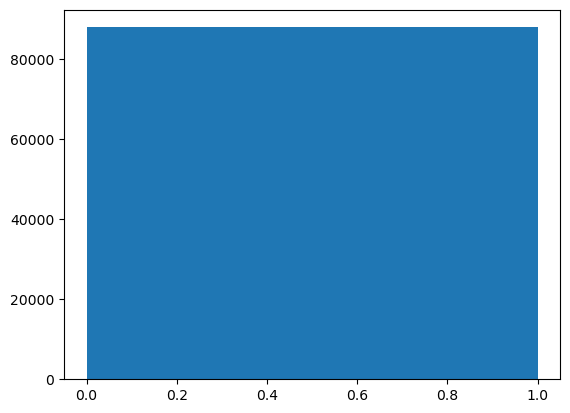

In [165]:
import matplotlib.pyplot as plt
plt.hist(y_balanced, bins=2) # 2 столбца для 2 классов
plt.show()

In [166]:
#Можно вычислить процентное соотношение каждого класса в y_balanced.
total_count = len(y_balanced)
class_0_count = y_balanced.value_counts()[0]
class_1_count = y_balanced.value_counts()[1]
class_0_proportion = class_0_count / total_count
class_1_proportion = class_1_count / total_count

print(f"Доля класса 0: {class_0_proportion:.2f}")
print(f"Доля класса 1: {class_1_proportion:.2f}")

Доля класса 0: 0.50
Доля класса 1: 0.50


Можно сделать вывод, что балансировка прошла успешно.

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size = 0.3, random_state = 42)

In [168]:
#Посмотрим на размерности тренировочных и тестовых выборок
x_train.shape, x_test.shape

((123270, 12), (52830, 12))

Обучим модель логистической регрессии

In [169]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

In [170]:
logreg = LogisticRegression()

In [171]:
# Обучим модель логистической регрессии на наших переменных
#train_cols = ['geo_country', 'is_represented', 'is_mobile']
#logreg.fit(x_train[train_cols], y_train)
logreg.fit(x_train, y_train)

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
from sklearn.metrics import roc_auc_score, roc_curve

In [173]:
logreg_pred_prob = logreg.predict_proba(x_test)[:, 1]  # берем вероятности для класса 1

In [174]:
auc_score = roc_auc_score(y_test, logreg_pred_prob)
print(f"ROC AUC: {auc_score}")

ROC AUC: 0.6017214617015109


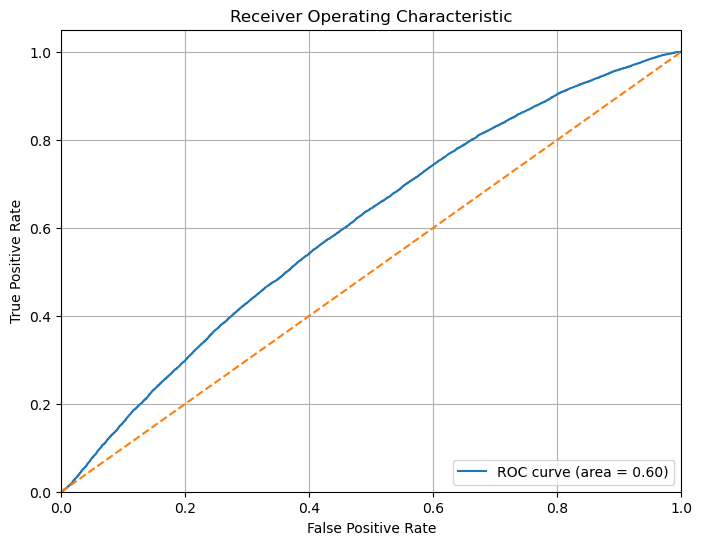

In [175]:
   fpr, tpr, thresholds = roc_curve(y_test, logreg_pred_prob)
   
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
   plt.plot([0, 1], [0, 1], linestyle='--')  # линия случайного прогноза
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('Receiver Operating Characteristic')
   plt.legend(loc='lower right')
   plt.grid()
   plt.show()

In [176]:
#Посмотрим вероятности отношения к классам
logreg.predict_proba(x_test) 

array([[0.54083976, 0.45916024],
       [0.49073304, 0.50926696],
       [0.59463456, 0.40536544],
       ...,
       [0.63967821, 0.36032179],
       [0.50290864, 0.49709136],
       [0.58703739, 0.41296261]])

In [177]:
#Посмотреть значения коэффициентов при каждой фиче
#Коэффициенты показывают влияние каждого признака на предсказанную вероятность.
for col, i in zip(x_train, logreg.coef_[0]):
    print(f'Коэффициент при колонке {col}={i}')

Коэффициент при колонке hit_number=0.00895214729655259
Коэффициент при колонке visit_number=-0.006802644705977761
Коэффициент при колонке geo_country=0.01397835669463033
Коэффициент при колонке is_social=0.012403589543452215
Коэффициент при колонке is_organic=-0.034564885443536406
Коэффициент при колонке is_mobile=0.11464172764633464
Коэффициент при колонке is_represented=0.08222619816457627
Коэффициент при колонке visit_year=0.0004200591827640657
Коэффициент при колонке visit_month=-0.08162532170391888
Коэффициент при колонке visit_day=-0.011740255766982156
Коэффициент при колонке visit_weekday=-0.02587341955124177
Коэффициент при колонке visit_hour=-0.012236086241588333


In [178]:
#Узнать значение свободного члена
logreg.intercept_ 

array([2.07859766e-07])

In [179]:
#Посмотреть, какое качество дала регрессия при обучении на тренировочной выборке
logreg.score(x_train, y_train)

0.5703902003731646

In [180]:
#Посмотреть, какие параметры были применены при обучении модели
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [181]:
# Задайте сетку гиперпараметров
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['saga'] # Используйте только "saga" для L1-регуляризации
}

grid_search = GridSearchCV(
    LogisticRegression(), param_grid, cv=5, scoring='roc_auc'
)
grid_search.fit(x_balanced, y_balanced)

print(f"Лучшие гиперпараметры: {grid_search.best_params_}")
print(f"Лучший AUC: {grid_search.best_score_}")

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Лучшие гиперпараметры: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Лучший AUC: 0.48220084640360705


C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [182]:
#Настроим параметры линейной регрессии для улучшения качества модели
#Созданим модель логистической регрессии с L1 регуляризацией и использованием алгоритма SAGA
logreg_tuned = LogisticRegression(penalty='l1', solver='saga', C = 0.01)

In [183]:
#Обучаем модель на тренировочных данных
logreg_tuned.fit(x_train, y_train)

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [184]:
# Предсказание вероятностей для тестовых данных
logreg_pred_prob = logreg_tuned.predict_proba(x_test)[:, 1]

In [185]:
# Вычисление AUC (площадь под кривой ROC)
auc_score = roc_auc_score(y_test, logreg_tuned.predict_proba(x_test)[:,1])
print(f"ROC AUC: {auc_score}")

ROC AUC: 0.6045697540231473


In [186]:
#Точность(Precision): Выведем долю верно предсказанных положительных примеров среди всех, которые модель классифицировала как положительные.
from sklearn.metrics import precision_score
precision = precision_score(y_test, logreg_tuned.predict(x_test))
print(f"Точность: {precision}")

Точность: 0.5710614342824508


In [187]:
#Полнота (Recall): Показывает долю верно предсказанных положительных примеров среди всех, которые действительно являются положительными.
from sklearn.metrics import recall_score
recall = recall_score(y_test, logreg_tuned.predict(x_test))
print(f"Полнота: {recall}")

Полнота: 0.5312310261080753


In [188]:
# F1-мера: Гармоническое среднее между точностью и полнотой.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, logreg_tuned.predict(x_test))
print(f"F1-мера: {f1}")

F1-мера: 0.5504266110958205


In [189]:
#Матрица ошибок (Confusion Matrix): Показывает количество истинно положительных, истинно отрицательных, ложно положительных и ложно отрицательных предсказаний.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logreg_tuned.predict(x_test))
print(cm)

[[15963 10515]
 [12353 13999]]


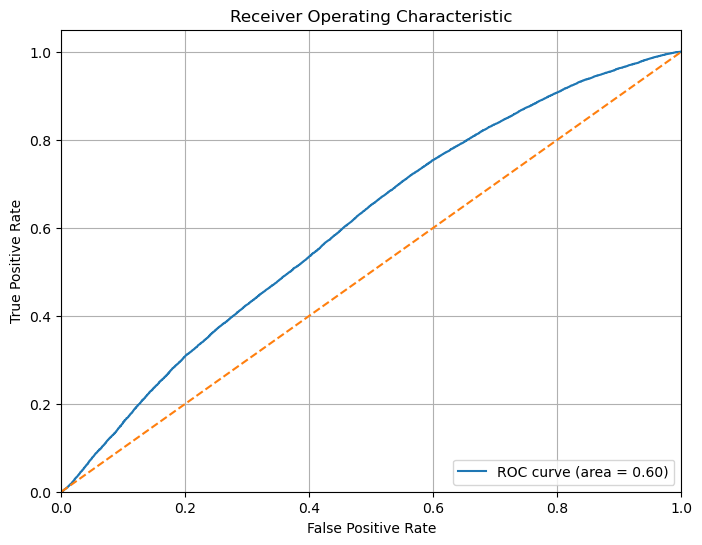

In [190]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, logreg_tuned.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--') # линия случайного прогноза
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

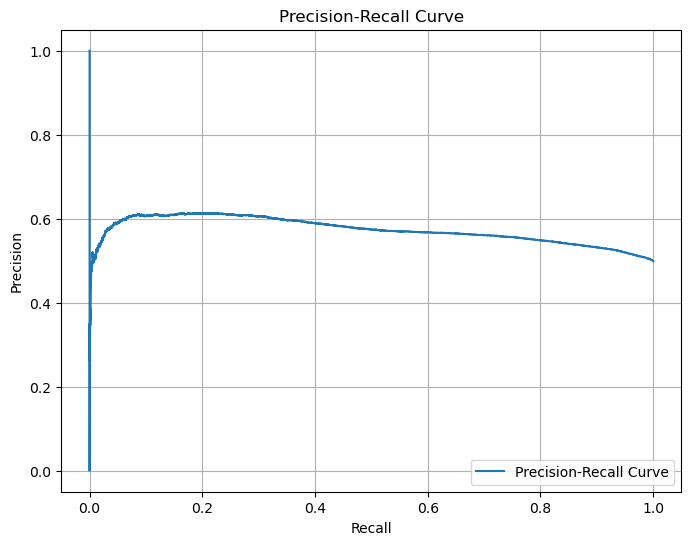

In [191]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, logreg_tuned.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
  

In [192]:
#Кросс-валидация:
from sklearn.model_selection import StratifiedKFold
#Stratified K-Fold кросс-валидация: Используется для сохранения пропорций классов при разделении данных на части.
from sklearn.model_selection import cross_val_score

# Создаем объект StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Вычисляем AUC для каждой складки
scores = cross_val_score(logreg_tuned, x_balanced, y_balanced, cv=skf, scoring='roc_auc')

print(f"Средний AUC: {scores.mean()}")
print(f"Стандартное отклонение AUC: {scores.std()}")

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Средний AUC: 0.48219992996081096
Стандартное отклонение AUC: 0.13250765703144693


C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


По полученным значениям можно сделать вывод, что данная модель логистической регрессии работает плохо и не лучше случайного прогноза. Скорее всего, логистическая регрессия не подходит для описания данной задачи.

Попробуем построить модель случайного леса.

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.3, random_state=42)

In [195]:
rf_model = RandomForestClassifier(random_state=42)

In [196]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [197]:
y_pred = rf_model.predict(x_test)

In [198]:
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC на тестовой выборке: {auc_score}")

AUC на тестовой выборке: 0.7186339122859806


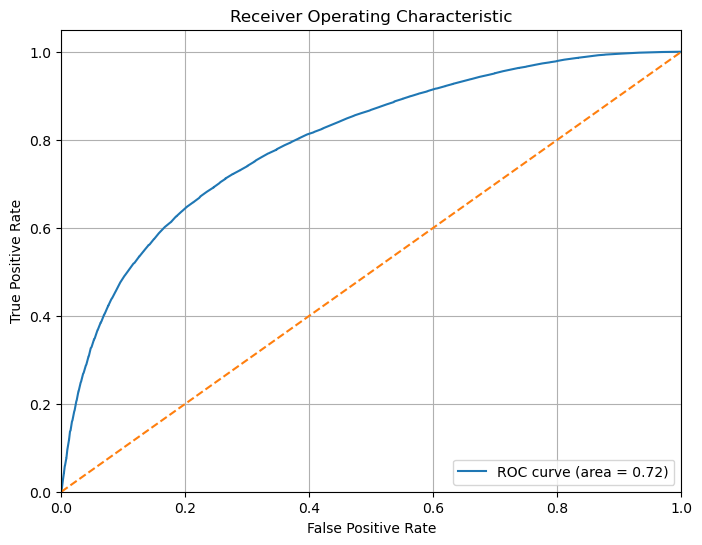

In [199]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--') # линия случайного прогноза
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Модель случайного леса показала лучший результат, чем модель логистической регрессии. Можно попытаться улучшить модель, применив гиперпараметры.

In [200]:
# Подбор гиперпараметров 
#param_grid = {
   # 'n_estimators': [500, 1000, 2000], # Количество деревьев в лесу
   # 'max_depth': [5, 10], # Максимальная глубина дерева
   # 'min_samples_split': [2, 4, 8], # Минимальное количество объектов для разделения узла
   # 'min_samples_leaf': [1, 2, 3] # Минимальное количество объектов в листе
#}

#grid_search = GridSearchCV(
 #   rf_model, param_grid, cv=5, scoring='roc_auc'
#)

#grid_search.fit(x_train, y_train)

#print(f"Лучшие гиперпараметры: {grid_search.best_params_}")
#print(f"Лучший AUC: {grid_search.best_score_}")


In [201]:
#Обученим модель с оптимальными гиперпараметрами
#rf_best_model = grid_search.best_estimator_ # Используйте лучшую модель из GridSearchCV

In [202]:
#rf_best_model

In [203]:
#Прогноз на тестовой выборке
#y_pred = rf_best_model.predict(x_test)

In [204]:
#y_pred

In [205]:
#Вычисление AUC
#auc_score = roc_auc_score(y_test, y_pred)
#print(f"AUC на тестовой выборке: {auc_score}")

In [206]:
#Матрица ошибок (Confusion Matrix): Показывает количество истинно положительных, истинно отрицательных, ложно положительных и ложно отрицательных предсказаний.
#from sklearn.metrics import confusion_matrix
#cm_new = confusion_matrix(y_test, rf_best_model.predict(x_test))
#print(cm_new)

In [207]:
#from sklearn.metrics import roc_curve
#import matplotlib.pyplot as plt

#fpr, tpr, thresholds = roc_curve(y_test, rf_best_model.predict_proba(x_test)[:, 1])

#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
#plt.plot([0, 1], [0, 1], linestyle='--') # линия случайного прогноза
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc='lower right')
#plt.grid()
#plt.show()

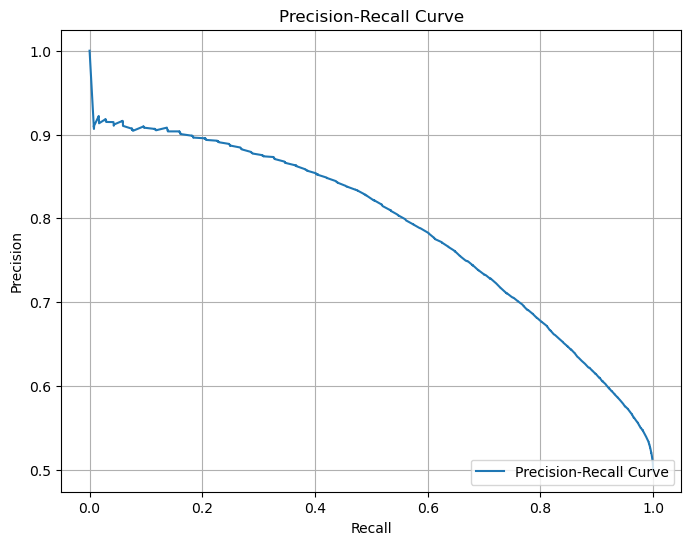

In [208]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
  

In [209]:
#Кросс-валидация:
from sklearn.model_selection import StratifiedKFold
#Stratified K-Fold кросс-валидация: Используется для сохранения пропорций классов при разделении данных на части.
from sklearn.model_selection import cross_val_score

# Создаем объект StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Вычисляем AUC для каждой складки
scores = cross_val_score(rf_model, x_balanced, y_balanced, cv=skf, scoring='roc_auc')

print(f"Средний AUC: {scores.mean()}")
print(f"Стандартное отклонение AUC: {scores.std()}")

Средний AUC: 0.35221300974712044
Стандартное отклонение AUC: 0.04997702729335928


Сохраним файл pkl

In [210]:
import pickle

In [212]:
filename = "final_work.pkl"
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)

In [213]:
#Проверим, что модель сохранилась как надо и другой разработчик сможет с её помощью делать предсказания.
# Откроем этот файл для чтения в бинарном виде с помощью функции open
with open(filename, 'rb') as file:
     clf = pickle.load(file)
clf.predict(x.head(1))

array([0], dtype=int64)

Файл Main.py 

In [ ]:
#Класс для принятия входных полей
from pydantic import BaseModel
from typing import Union
class VisitIn(BaseModel):
    hit_id: str
    utm_source: Union[str, None] = None
    utm_medium: Union[str, None] = None
    utm_campaign: Union[str, None] = None
    utm_adcontent: Union[str, None] = None
    utm_keyword: Union[str, None] = None
    device_category: Union[str, None] = None
    device_os: Union[str, None] = None
    device_brand: Union[str, None] = None
    device_screen_resolution: Union[str, None] = None
    device_browser: Union[str, None] = None
    geo_country: Union[str, None] = None
    geo_city: Union[str, None] = None
   # visit_date: date
   # visit_time: time
    visit_number: Union[int, None] = None

In [ ]:
#Класс для вывода результата

class TargetOut(BaseModel):
    hit_id: str
    target: str

In [ ]:
#Функция для обработки фичей - она преборазует входные фичи в нужный для модели формат

def generate_basic_features(df):
    # create is_* features if missing
    df['is_organic'] = [*map(lambda x: True if x in ['organic', 'referral', '(none)'] else False,
                             df['utm_medium'].values)]

    df['is_mobile'] = [*map(lambda x: True if x in ['mobile'] else False,
                            df['device_category'].values)]

    df['is_represented'] = [*map(lambda x: True if x in ['Moscow', 'Saint Petersburg', 'Balashikha',
                                                         'Khimki', 'Odintsovo', 'Vidnoye', 'Mytishchi',
                                                         'Zheleznodorozhny', 'Domodedovo', 'Korolyov'] else False,
                                 df['geo_city'].values)]

    df['is_social'] = [*map(lambda x: True if x in ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                                                    'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                                                    'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'] else False,
                            df['utm_source'].values)]

    # replace is_* with 0\1
    for col in ['is_organic', 'is_mobile', 'is_represented', 'is_social']:
        df[col] = df[col].astype(int)

    # categorical features
    for col in ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword',
                'device_category', 'device_os', 'device_brand', 'device_screen_resolution', 'device_browser',
                'geo_country', 'geo_city']:
        df[col] = df[col].fillna('undefined')
        le = LabelEncoder()
        le.classes_ = np.load(f'encoder_classes_{col}.npy')
        le.fit(list(set(df[col].dropna().unique())))
        df[col] = le.transform(df[col])

        del le

    # time features
    df['visit_date'] = df['visit_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    df['visit_time'] = df['visit_time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
    df['visit_year'] = df['visit_date'].apply(lambda x: x.year)
    df['visit_month'] = df['visit_date'].apply(lambda x: x.month)
    df['visit_day'] = df['visit_date'].apply(lambda x: x.day)
    df['visit_weekday'] = df['visit_date'].apply(lambda x: x.weekday())
    df['visit_hour'] = df['visit_time'].apply(lambda x: x.hour)
    return df

In [ ]:
#Функция для кодирования данных

def encode_data(payload):
    if isinstance(payload, pydantic.BaseModel):
        encoded_dataframe = pd.DataFrame(jsonable_encoder(payload), index=[0])
        df = generate_basic_features(encoded_dataframe)
        return df
    else:
        raise Exception

In [ ]:
#Функция для получения предсказания

def predict(payload):
    model_file = Path(BASE_DIR + '\ga_model.joblib')
    if not model_file.exists():
        return False

    model = joblib.load(model_file)

    df = encode_data(payload)
    print(df)

    hit_id = df['hit_id'][0]
    df = df.drop(columns=['hit_id', 'visit_date', 'visit_time', 'visit_number'])
    target_event = str(model.predict(df.to_numpy()))

    return {"hit_id": f"{hit_id}", "target": f"{target_event}"}

In [ ]:
#Функция для обработки запроса по предсказанию

from fastapi import FastAPI
import uvicorn
app = FastAPI() 
@app.post("/predict", response_model=TargetOut, status_code=200)
def get_prediction(payload: VisitIn):
    prediction = predict(payload)

    if not payload:
        raise HTTPException(status_code=400, detail="Something went wrong")

    return prediction

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8008)